# Unsupervised Learning: Trade & Ahead



<center><img src="https://images.pexels.com/photos/6802048/pexels-photo-6802048.jpeg?auto=compress&cs=tinysrgb&w=600" width="400" height="600"></center>

<b><h2><center>Prepared by: Melissa Hills</center></h2></b>

## Problem Statement

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 yellowbrick==1.5 -q --user

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.2 yellowbrick==1.5 -q --user
# !pip install --upgrade -q jinja2

In [ ]:
# To suppress the warnings
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to compute distances
from scipy.spatial.distance import pdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# mount your google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading the dataset
path = "/content/drive/MyDrive/UTAS/8Unsupervised_Learning/Project/stock_data.csv"
data = pd.read_csv(path)

## Data Overview

In [ ]:
# shape of the dataset
data.shape

(340, 15)

In [ ]:
# look at random sample of 10 rows
data.sample(n=10, random_state=1)

Ticker Symbol                     Security             GICS Sector  \
102           DVN           Devon Energy Corp.                  Energy   
125            FB                     Facebook  Information Technology   
11            AIV  Apartment Investment & Mgmt             Real Estate   
248            PG             Procter & Gamble        Consumer Staples   
238           OXY         Occidental Petroleum                  Energy   
336           YUM              Yum! Brands Inc  Consumer Discretionary   
112           EQT              EQT Corporation                  Energy   
147           HAL              Halliburton Co.                  Energy   
89            DFS  Discover Financial Services              Financials   
173           IVZ                 Invesco Ltd.              Financials   

                      GICS Sub Industry  Current Price  Price Change  \
102  Oil & Gas Exploration & Production      32.000000    -15.478079   
125        Internet Software & Services     104.660004     16.224320   
11                                REITs      40.029999      7.578608   
248                   Personal Products      79.410004     10.660538   
238  Oil & Gas Exploration & Production      67.610001      0.865287   
336                         Restaurants      52.516175     -8.698917   
112  Oil & Gas Exploration & Production      52.130001    -21.253771   
147      Oil & Gas Equipment & Services      34.040001     -5.101751   
89                     Consumer Finance      53.619999      3.653584   
173    Asset Management & Custody Banks      33.480000      7.067477   

     Volatility  ROE  Cash Ratio  Net Cash Flow   Net Income  \
102    2.923698  205          70      830000000 -14454000000   
125    1.320606    8         958      592000000   3669000000   
11     1.163334   15          47       21818000    248710000   
248    0.806056   17         129      160383000    636056000   
238    1.589520   32          64     -588000000  -7829000000   
336    1.478877  142          27      159000000   1293000000   
112    2.364883    2         201      523803000     85171000   
147    1.966062    4         189     7786000000   -671000000   
89     1.159897   20          99     2288000000   2297000000   
173    1.580839   12          67      412000000    968100000   

     Earnings Per Share  Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
102              -35.55                  4.065823e+08  93.089287   1.785616  
125                1.31                  2.800763e+09  79.893133   5.884467  
11                 1.52                  1.636250e+08  26.335526  -1.269332  
248                3.28                  4.913916e+08  24.070121  -2.256747  
238              -10.23                  7.652981e+08  93.089287   3.345102  
336                2.97                  4.353535e+08  17.682214  -3.838260  
112                0.56                  1.520911e+08  93.089287   9.567952  
147               -0.79                  8.493671e+08  93.089287  17.345857  
89                 5.14                  4.468872e+08  10.431906  -0.375934  
173                2.26                  4.283628e+08  14.814159   4.218620

In [ ]:
# data types for original dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

In [ ]:
# create a copy of the original data to avoid any changes to original dataset
df=data.copy()

In [ ]:
# rename the columns by replacing spaces with underscore
df.columns=[c.replace(" ", "_") for c in df.columns]

In [ ]:
# statistical summary for original dataset
df.describe(include='all').T

count unique  \
Ticker_Symbol                   340    340   
Security                        340    340   
GICS_Sector                     340     11   
GICS_Sub_Industry               340    104   
Current_Price                 340.0    NaN   
Price_Change                  340.0    NaN   
Volatility                    340.0    NaN   
ROE                           340.0    NaN   
Cash_Ratio                    340.0    NaN   
Net_Cash_Flow                 340.0    NaN   
Net_Income                    340.0    NaN   
Earnings_Per_Share            340.0    NaN   
Estimated_Shares_Outstanding  340.0    NaN   
P/E_Ratio                     340.0    NaN   
P/B_Ratio                     340.0    NaN   

                                                             top freq  \
Ticker_Symbol                                                AAL    1   
Security                                 American Airlines Group    1   
GICS_Sector                                          Industrials   53   
GICS_Sub_Industry             Oil & Gas Exploration & Production   16   
Current_Price                                                NaN  NaN   
Price_Change                                                 NaN  NaN   
Volatility                                                   NaN  NaN   
ROE                                                          NaN  NaN   
Cash_Ratio                                                   NaN  NaN   
Net_Cash_Flow                                                NaN  NaN   
Net_Income                                                   NaN  NaN   
Earnings_Per_Share                                           NaN  NaN   
Estimated_Shares_Outstanding                                 NaN  NaN   
P/E_Ratio                                                    NaN  NaN   
P/B_Ratio                                                    NaN  NaN   

                                           mean                std  \
Ticker_Symbol                               NaN                NaN   
Security                                    NaN                NaN   
GICS_Sector                                 NaN                NaN   
GICS_Sub_Industry                           NaN                NaN   
Current_Price                         80.862345          98.055086   
Price_Change                           4.078194          12.006338   
Volatility                             1.525976           0.591798   
ROE                                   39.597059          96.547538   
Cash_Ratio                            70.023529          90.421331   
Net_Cash_Flow                   55537620.588235  1946365312.175789   
Net_Income                    1494384602.941176  3940150279.327936   
Earnings_Per_Share                     2.776662           6.587779   
Estimated_Shares_Outstanding    577028337.75403   845849595.417695   
P/E_Ratio                             32.612563          44.348731   
P/B_Ratio                             -1.718249          13.966912   

                                        min          25%          50%  \
Ticker_Symbol                           NaN          NaN          NaN   
Security                                NaN          NaN          NaN   
GICS_Sector                             NaN          NaN          NaN   
GICS_Sub_Industry                       NaN          NaN          NaN   
Current_Price                           4.5       38.555       59.705   
Price_Change                     -47.129693    -0.939484     4.819505   
Volatility                         0.733163     1.134878     1.385593   
ROE                                     1.0         9.75         15.0   
Cash_Ratio                              0.0         18.0         47.0   
Net_Cash_Flow                -11208000000.0 -193906500.0    2098000.0   
Net_Income                   -23528000000.0  352301250.0  707336000.0   
Earnings_Per_Share                    -61.2       1.5575        2.895   
Estimated_Shares_Outstanding    27672156.86  158848216

* `Ticker_Symbol` and `Security` are all unique values. Thus we will drop these 2 columns.

In [ ]:
#Look at all unique values for `GICS_Sector`
df['GICS_Sector'].unique()

array(['Industrials', 'Health Care', 'Information Technology',
       'Consumer Staples', 'Utilities', 'Financials', 'Real Estate',
       'Materials', 'Consumer Discretionary', 'Energy',
       'Telecommunications Services'], dtype=object)

In [ ]:
#Look at all unique values for `GICS_Sector`
df['GICS_Sub_Industry'].unique()

array(['Airlines', 'Pharmaceuticals', 'Health Care Equipment',
       'Application Software', 'Semiconductors', 'Agricultural Products',
       'Data Processing & Outsourced Services', 'MultiUtilities',
       'Electric Utilities', 'Life & Health Insurance',
       'Property & Casualty Insurance', 'REITs', 'Multi-line Insurance',
       'Insurance Brokers', 'Internet Software & Services',
       'Specialty Chemicals', 'Building Products', 'Biotechnology',
       'Semiconductor Equipment', 'Electrical Components & Equipment',
       'Asset Management & Custody Banks', 'Specialized REITs',
       'Internet & Direct Marketing Retail', 'Specialty Stores',
       'Managed Health Care', 'Oil & Gas Exploration & Production',
       'Electronic Components', 'Aerospace & Defense',
       'Home Entertainment Software', 'Residential REITs',
       'Water Utilities', 'Consumer Finance', 'Banks',
       'Oil & Gas Equipment & Services', 'Metal & Glass Containers',
       'Health Care Distributors',

In [ ]:
# check for missing values
df.isnull().sum()

Ticker_Symbol                   0
Security                        0
GICS_Sector                     0
GICS_Sub_Industry               0
Current_Price                   0
Price_Change                    0
Volatility                      0
ROE                             0
Cash_Ratio                      0
Net_Cash_Flow                   0
Net_Income                      0
Earnings_Per_Share              0
Estimated_Shares_Outstanding    0
P/E_Ratio                       0
P/B_Ratio                       0
dtype: int64

* There are no missng values.

In [ ]:
# check for duplicate rows
df.duplicated().sum()

0

* There are no duplicate rows of data.

## Exploratory Data Analysis (EDA)

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 3), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 4))
    else:
        plt.figure(figsize=(n + 2, 4))

    plt.xticks(rotation=90, fontsize=9)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Univariant analysis

Q1. What does the distribution of stock prices look like?

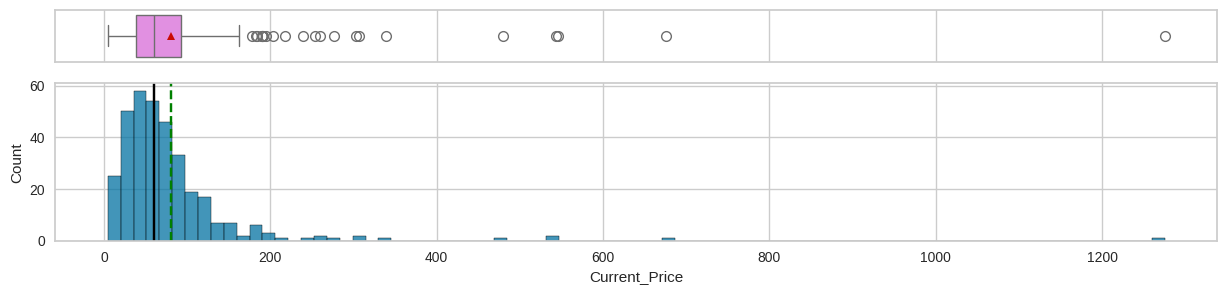

In [ ]:
# Question 1. What does the distribution of stock prices look like?
histogram_boxplot(df, 'Current_Price');

Observations:
* The current stock prices are right skewed.
* Outliers are present on the right side.

#### Boxplot and histogram for all numeric columns

In [ ]:
data.shape

(340, 15)

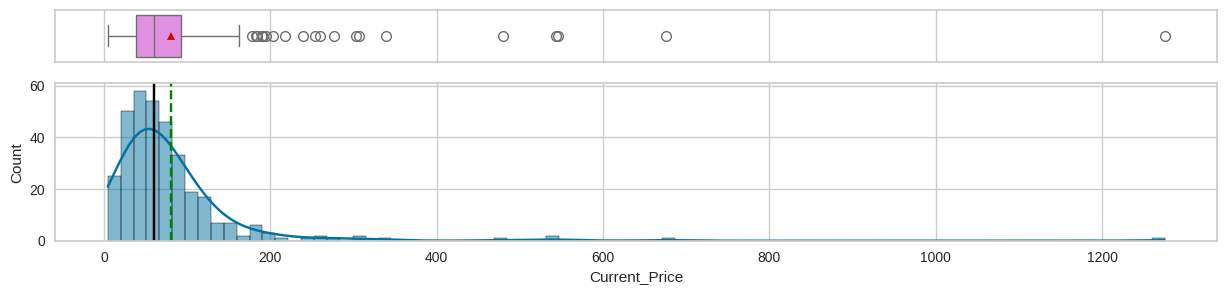

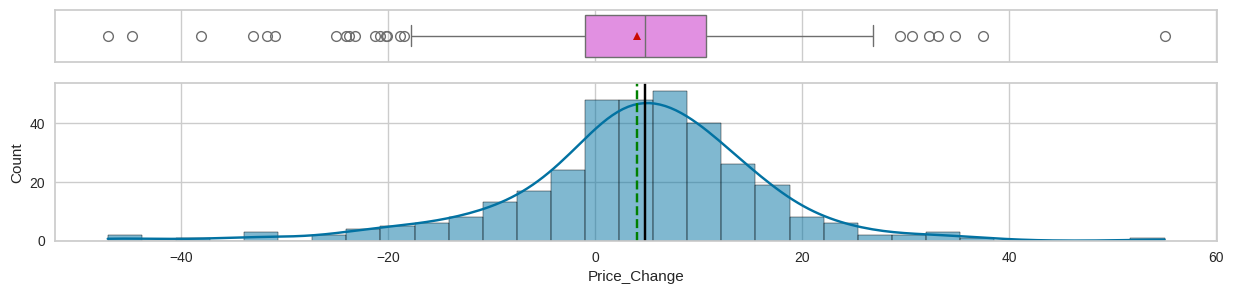

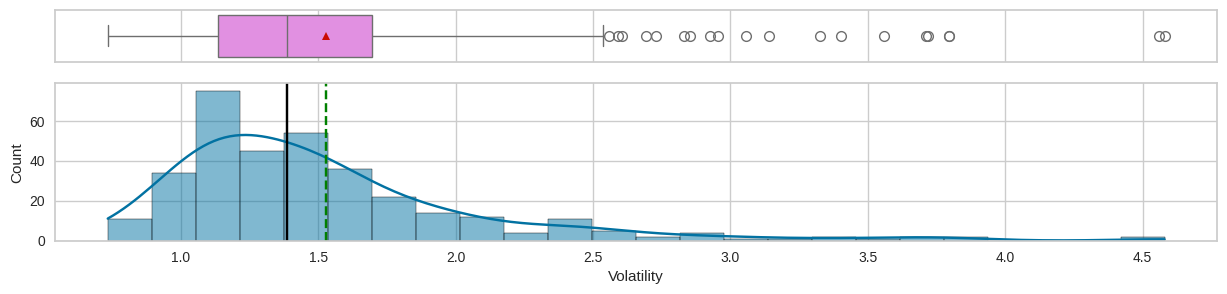

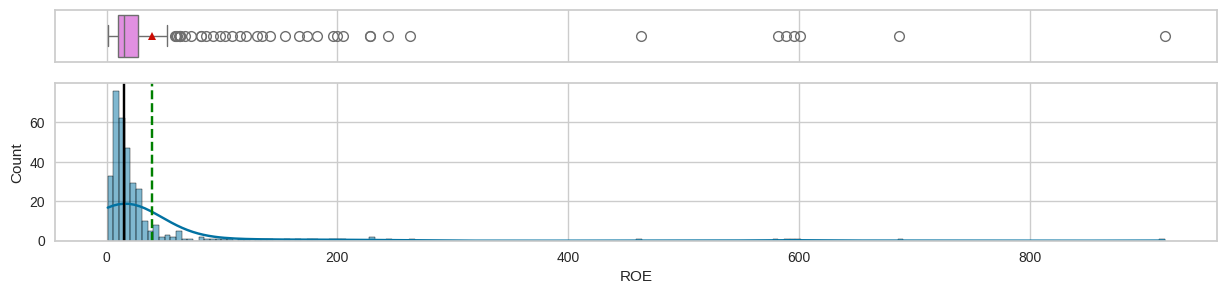

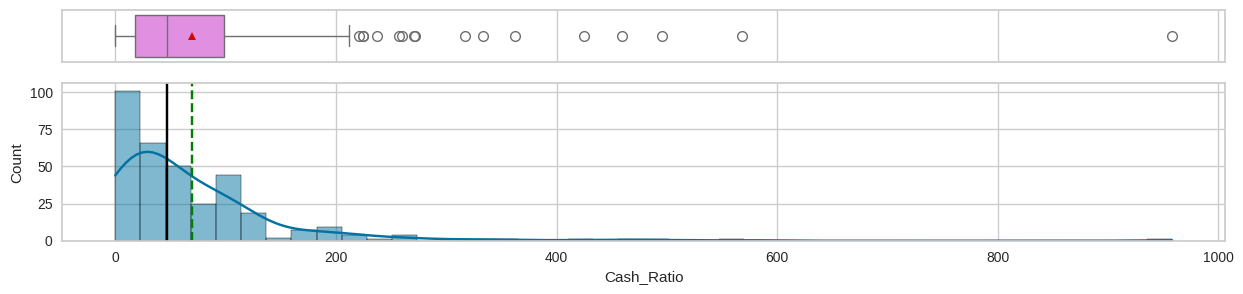

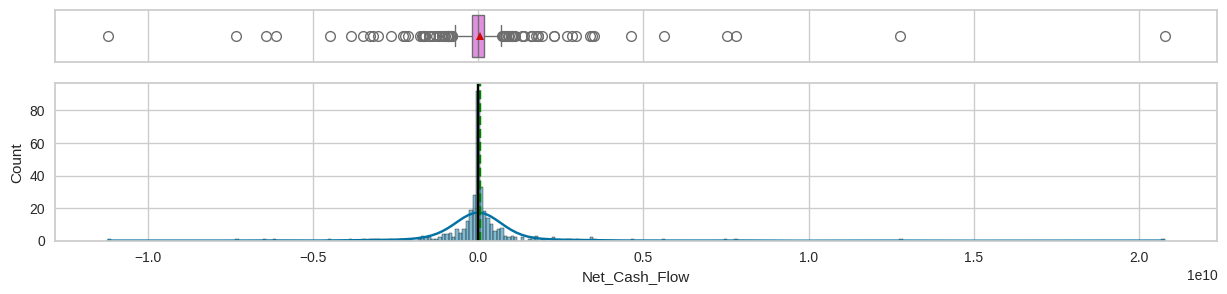

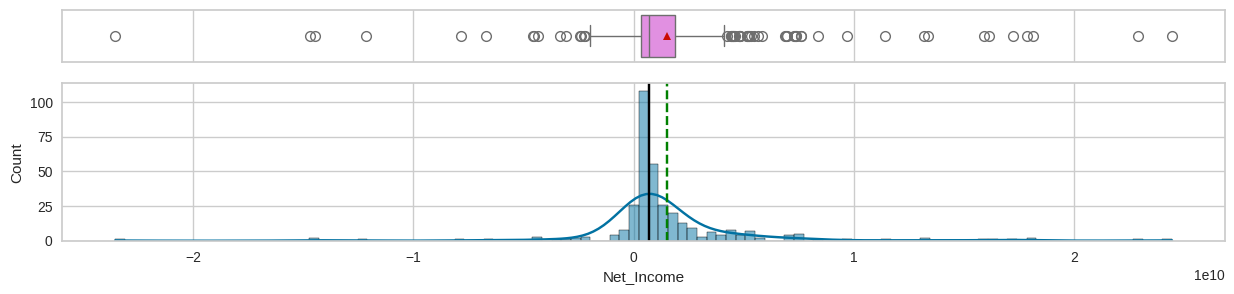

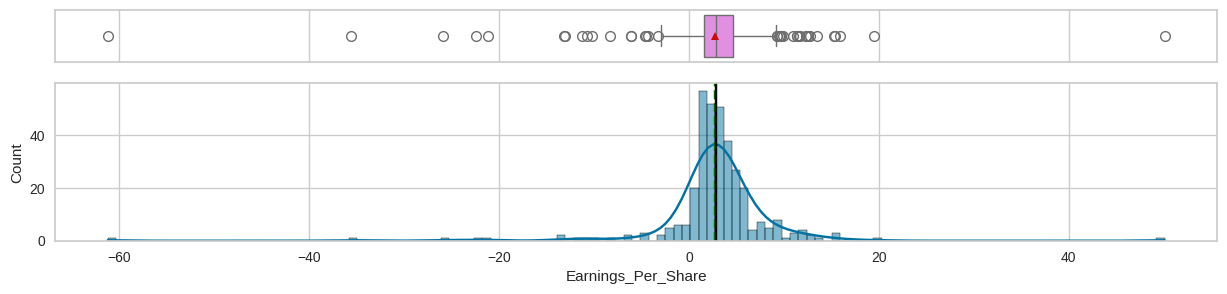

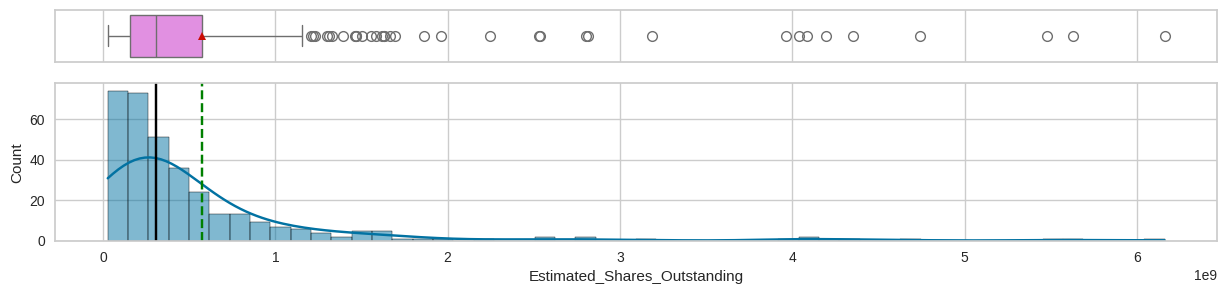

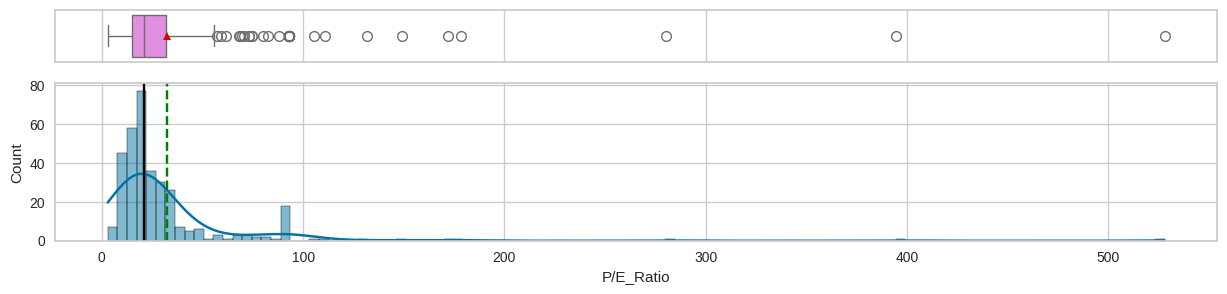

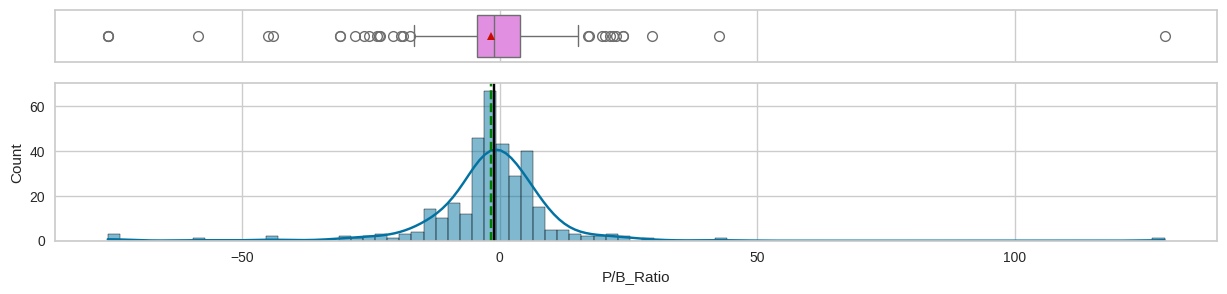

In [ ]:
# Get only numeric columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

for i in num_cols:
    histogram_boxplot(df, i, kde=True)

Observations:
* `Price_Change`, `Net_Cash_Flow`, `Earnings_Per_Share`, and `P/B _Ratio`  have a normal distribution with outliers on both ends.
* `Current_Price`, `Volatility`, `ROE`, `Cash_Ratio`, `Estimated_Shares_Outstanding` and `P/E Ratio`are all right skewed with outliers on the upper end.

#### CDF for numeric columns

In [ ]:
df.head()


Ticker_Symbol                 Security             GICS_Sector  \
0           AAL  American Airlines Group             Industrials   
1          ABBV                   AbbVie             Health Care   
2           ABT      Abbott Laboratories             Health Care   
3          ADBE        Adobe Systems Inc  Information Technology   
4           ADI     Analog Devices, Inc.  Information Technology   

       GICS_Sub_Industry  Current_Price  Price_Change  Volatility  ROE  \
0               Airlines      42.349998      9.999995    1.687151  135   
1        Pharmaceuticals      59.240002      8.339433    2.197887  130   
2  Health Care Equipment      44.910000     11.301121    1.273646   21   
3   Application Software      93.940002     13.977195    1.357679    9   
4         Semiconductors      55.320000     -1.827858    1.701169   14   

   Cash_Ratio  Net_Cash_Flow  Net_Income  Earnings_Per_Share  \
0          51     -604000000  7610000000               11.39   
1          77       51000000  5144000000                3.15   
2          67      938000000  4423000000                2.94   
3         180     -240840000   629551000                1.26   
4         272      315120000   696878000                0.31   

   Estimated_Shares_Outstanding   P/E_Ratio  P/B_Ratio  
0                  6.681299e+08    3.718174  -8.784219  
1                  1.633016e+09   18.806350  -8.750068  
2                  1.504422e+09   15.275510  -0.394171  
3                  4.996437e+08   74.555557   4.199651  
4                  2.247994e+09  178.451613   1.059810

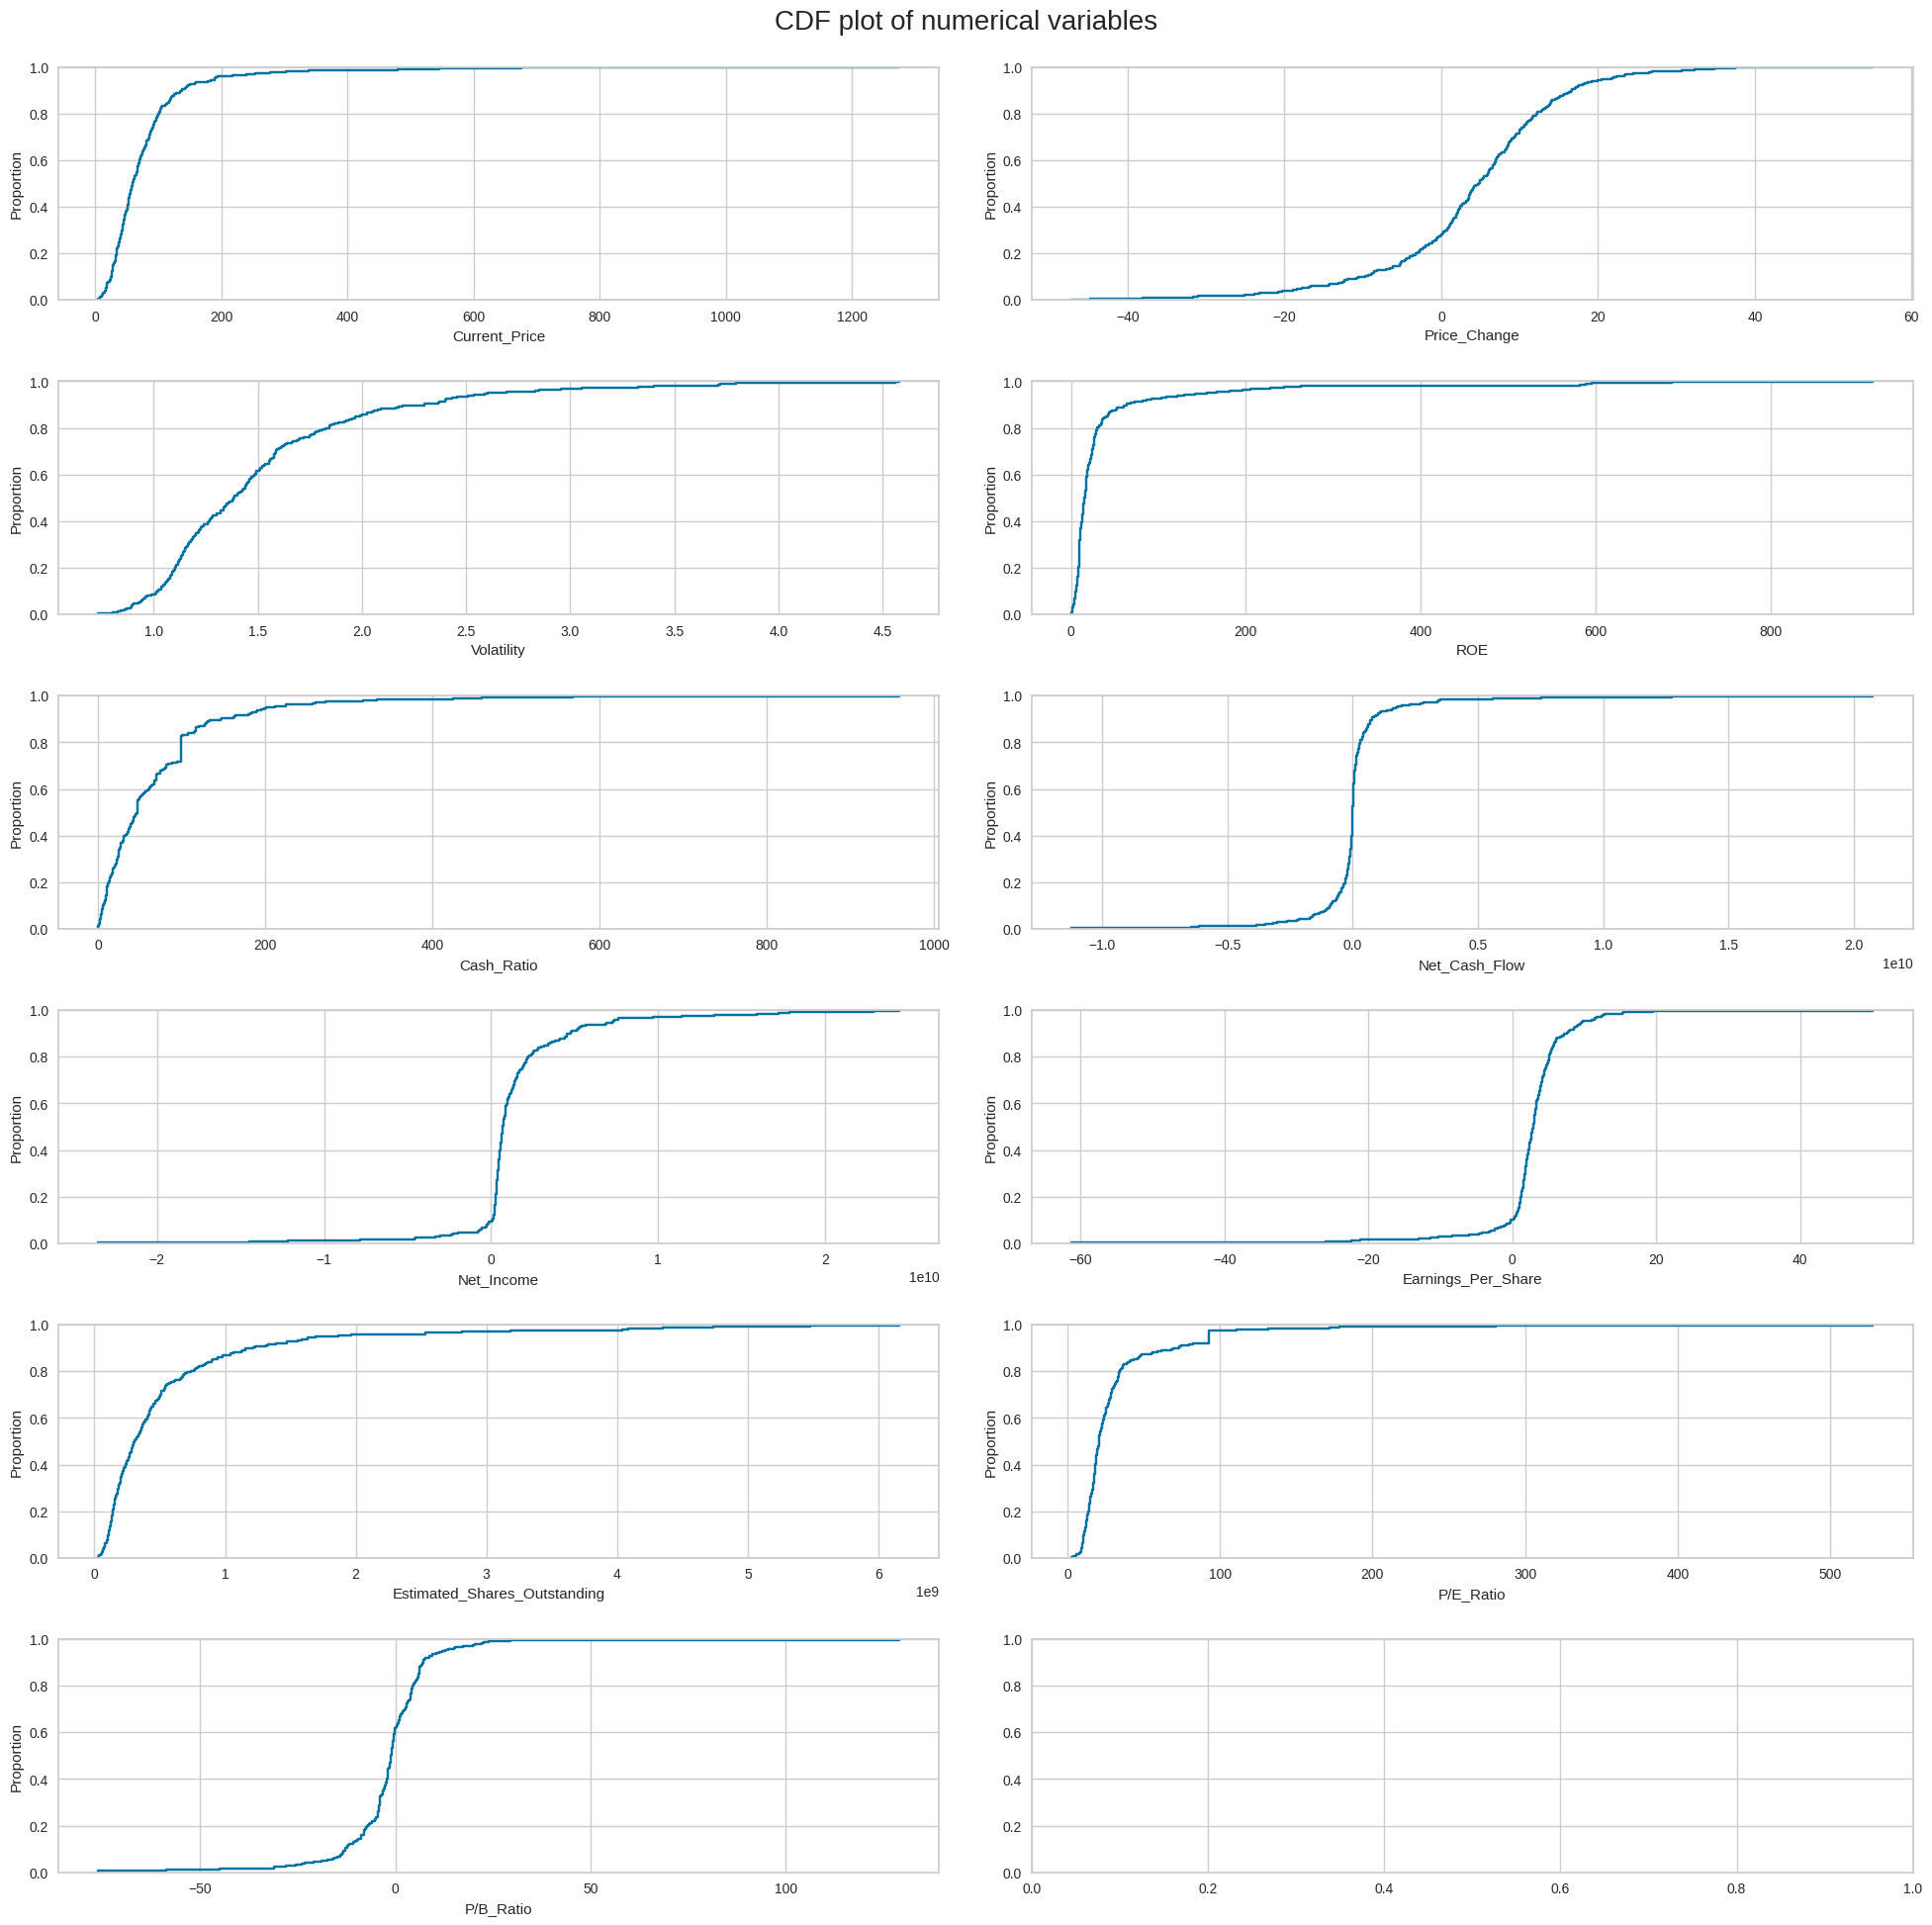

In [ ]:
# graph cdf for each numeric variable
fig, axes = plt.subplots(6, 2, figsize=(20, 20))
fig.suptitle("CDF plot of numerical variables", fontsize=20)
counter = 0
for ii in range(6):
    sns.ecdfplot(ax=axes[ii][0], x=df[num_cols[counter]])
    counter = counter + 1
    if counter != 11:
        sns.ecdfplot(ax=axes[ii][1], x=df[num_cols[counter]])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

Observations:
* 95% of stocks have a `Current_Price` less than $600

* 80% of `Price_Change` percentage is below ~17%

*	90% of `Net_Income` are less than $50,000,000,000

*	90% of `P/E_Ratio`’s are less than 50

#### GICS Sectors

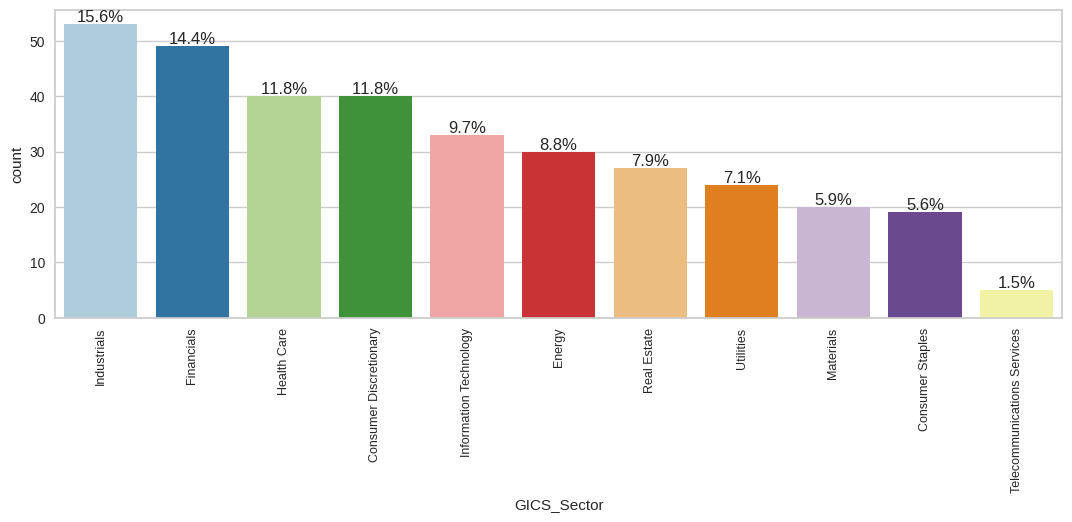

In [ ]:
# barplot on GICS Sectors
labeled_barplot(df, 'GICS_Sector', perc=True);

Observations:
* The largest GICS sector is industrials at 15.6% followed by finances(14.4%).
* The smalles GICS sector is telecommunications services.

#### GICS Sub Industry

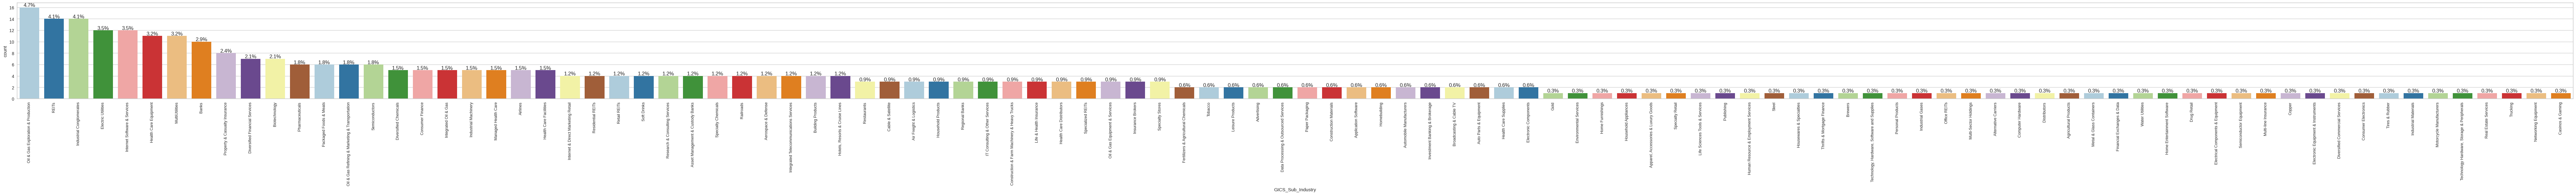

In [ ]:
# barplot on GICS Sub Industry
labeled_barplot(df, 'GICS_Sub_Industry', perc=True);

Observations:
* Oil & Gas Exploration & Production is the largest sub-industry that makes up 4.7% of the GICS.


### Bivariant analysis

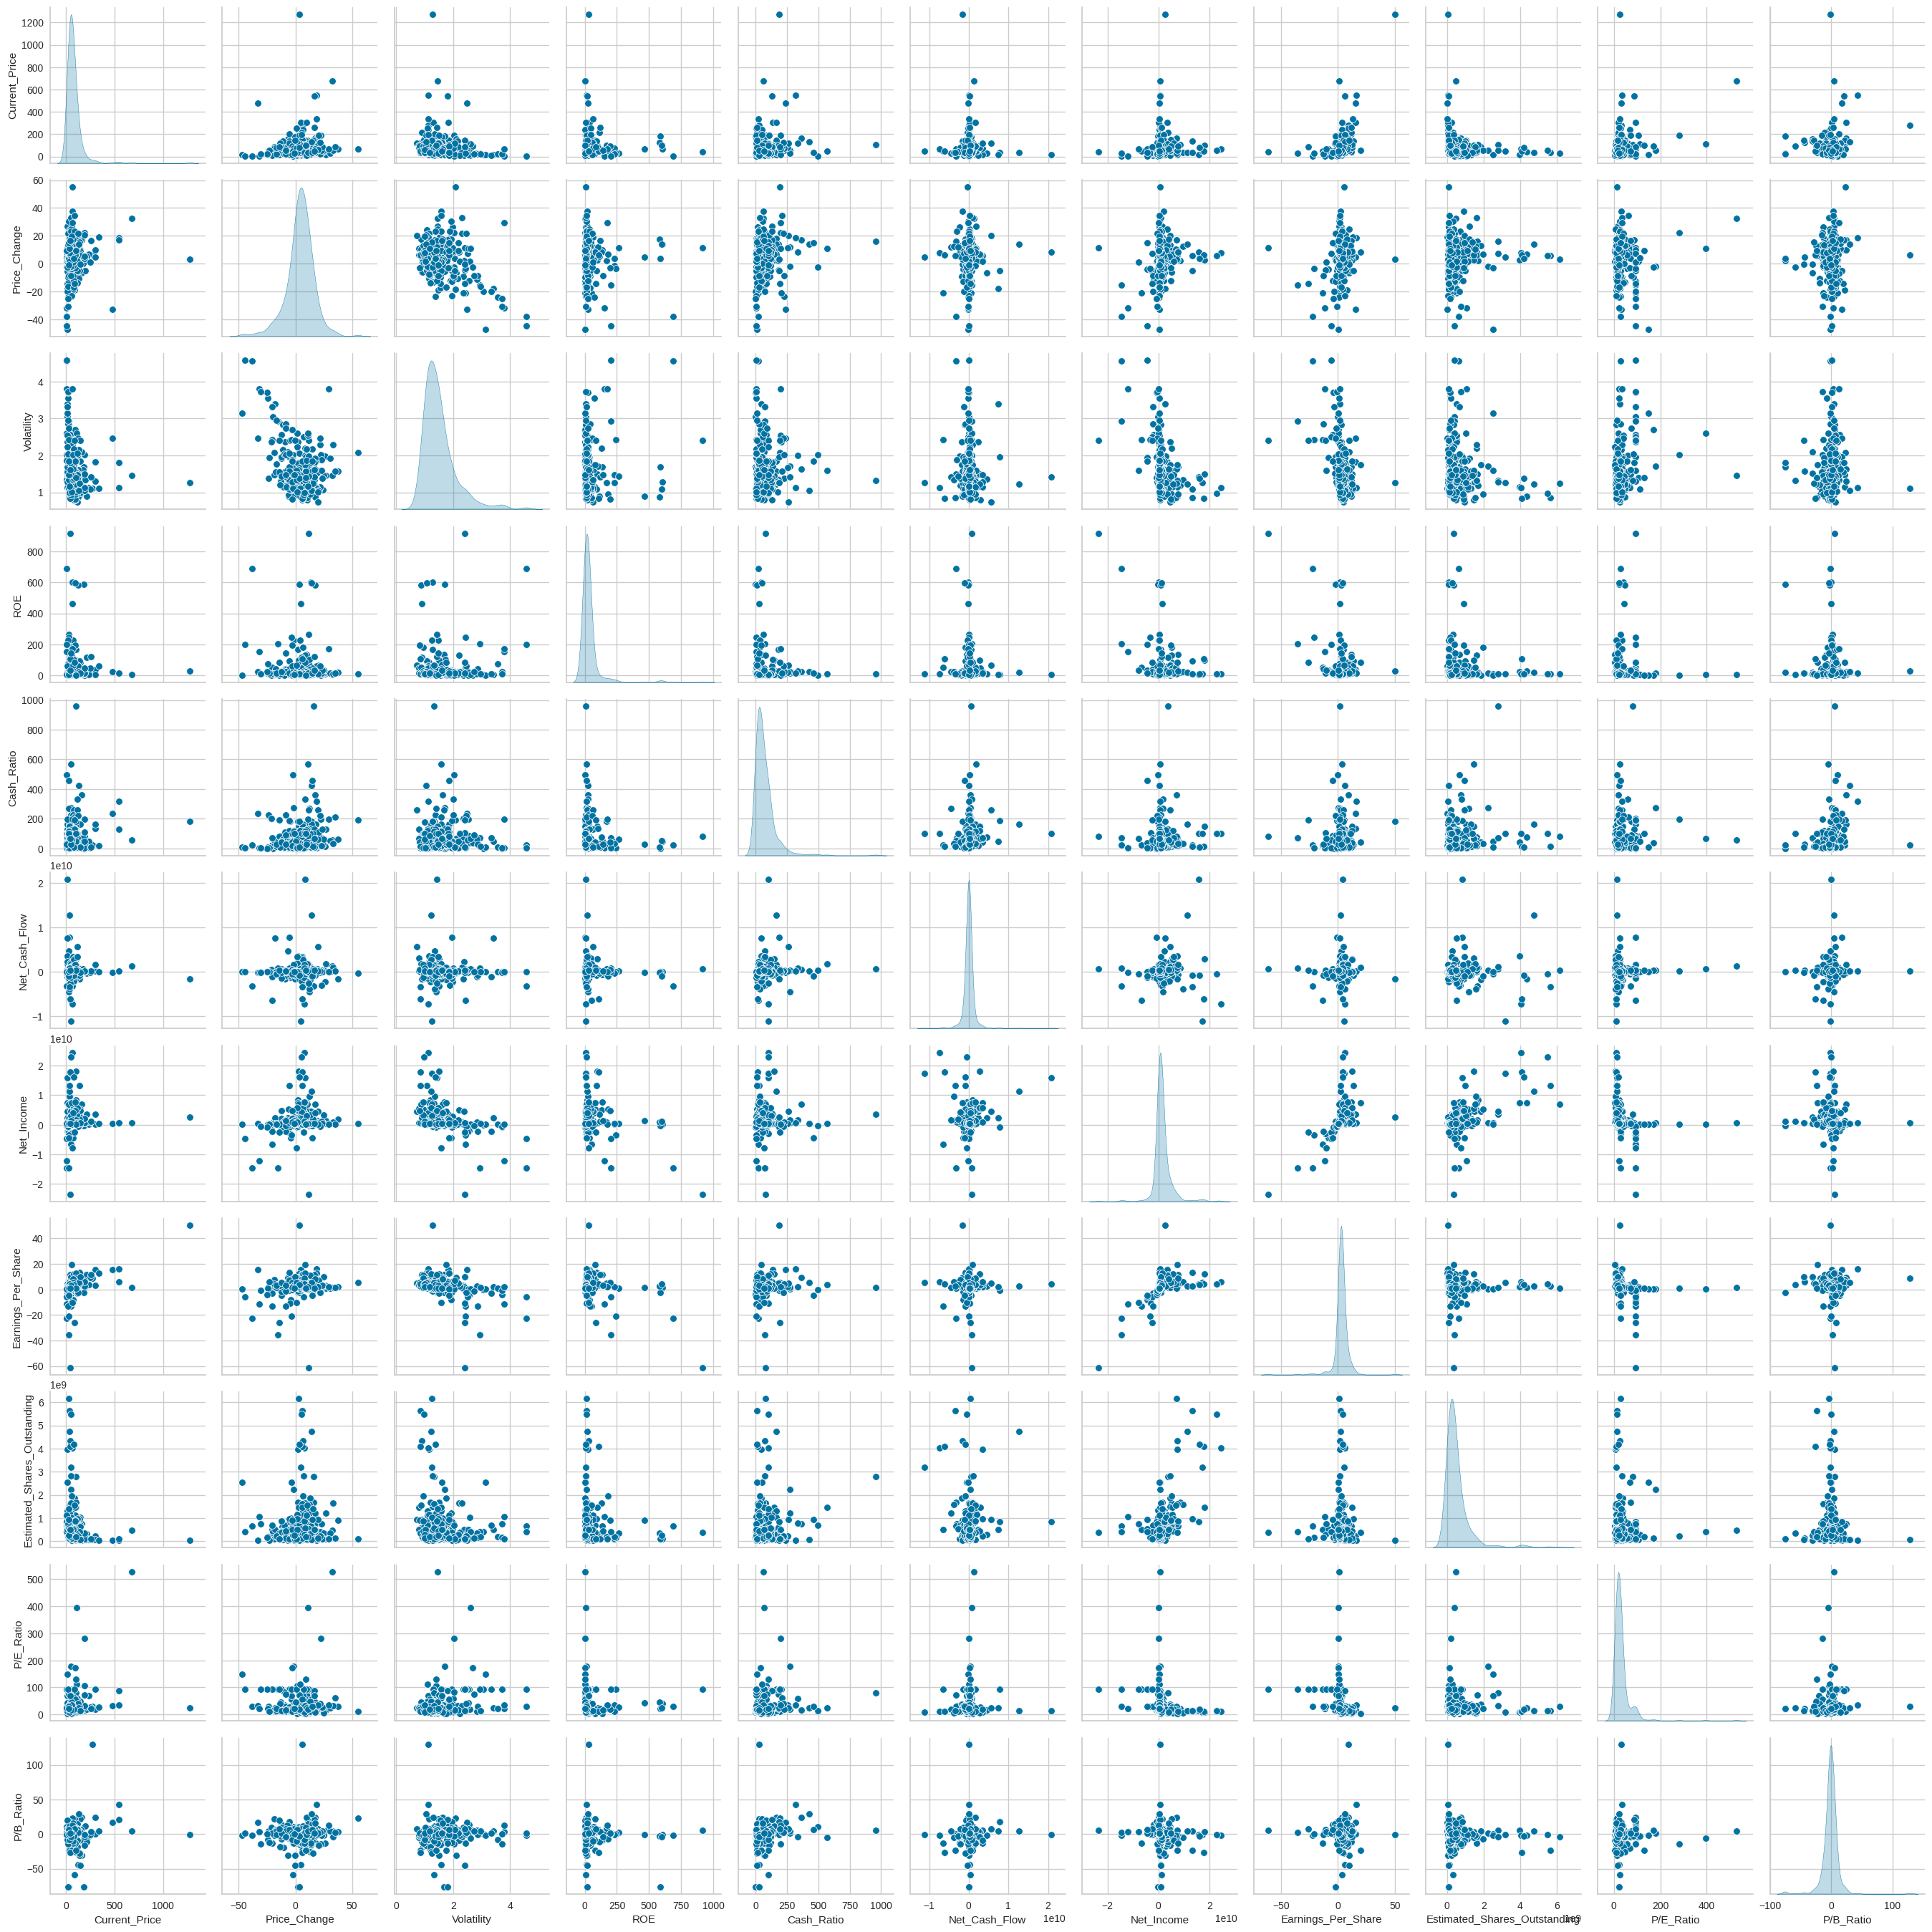

In [ ]:
sns.pairplot(df[num_cols], diag_kind='kde');

Observations:
* Some graphs are revealing 3 clusters/groups, such as `Estimated_Shares_Outstanding` and `ROE`
`Volatility` is revealing 4 clusters/groups.

#### Q2.
The stocks of which economic sector have seen the maximum price increase on average?

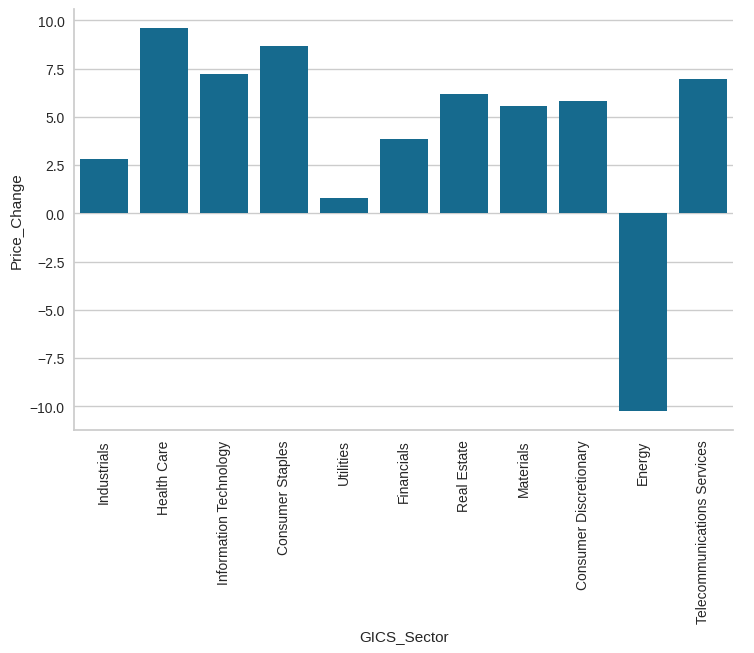

In [ ]:
sns.catplot(data=df, x='GICS_Sector', y='Price_Change', kind='bar', height=5, aspect=1.5, ci=None)
plt.xticks(rotation=90);

Observations:
* Healthcare has the highest price change for all GICS Sectors.
* Energy has had negative price changes.

#### Q3. Heatmap
How are the different variables correlated with each other?

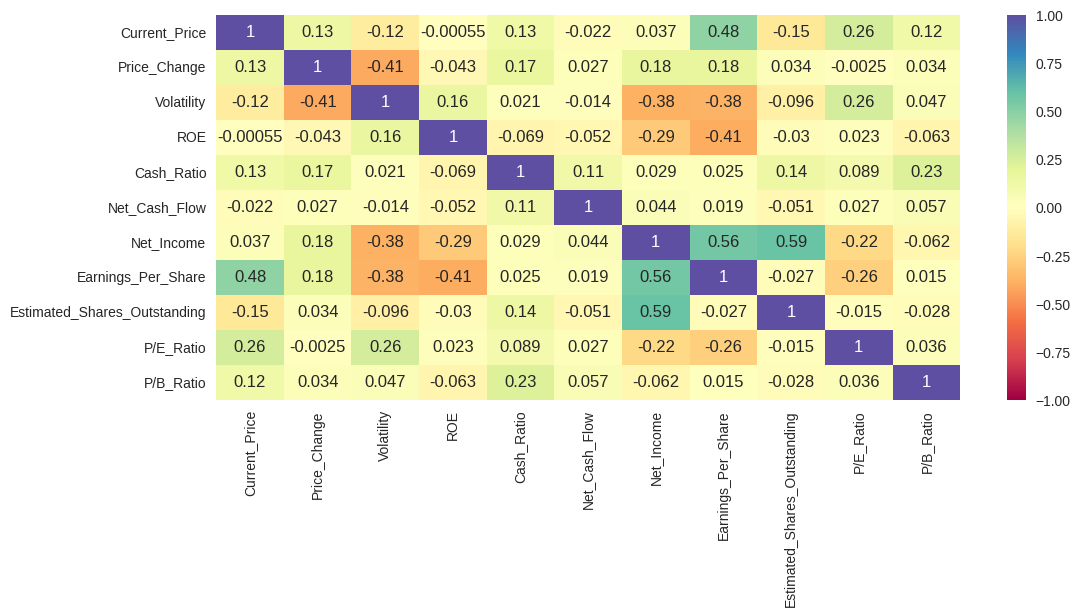

In [ ]:
# Let's look for correlation
plt.figure(figsize=(12, 5))
sns.heatmap(df[num_cols].corr(), vmin=-1, vmax=1, annot=True,cmap='Spectral', cbar=True);

Observations:
* There is a positive correlation between ` Estimates Shares Outstanding` and `Net Income`
* Also a positive correlation between `Earnings per share` and `Net Income`



#### Q4.
Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?

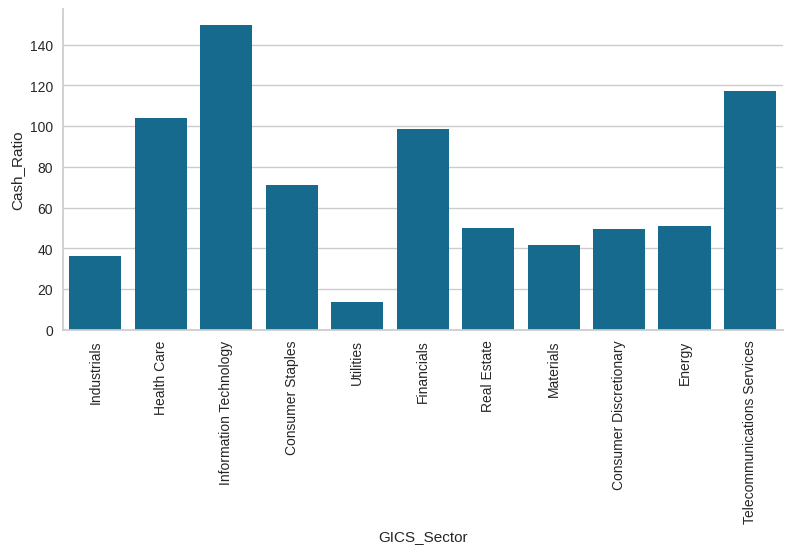

In [ ]:
sns.catplot(data=df, x='GICS_Sector', y='Cash_Ratio', kind='bar', height=4, aspect=2, ci=None)
plt.xticks(rotation=90);

Observations:
* Information Technology has the highest cash ratio, followed by Telecommunications Services.
* Utilites has the lowest cash ratio of all sectors.

#### Q5.
P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

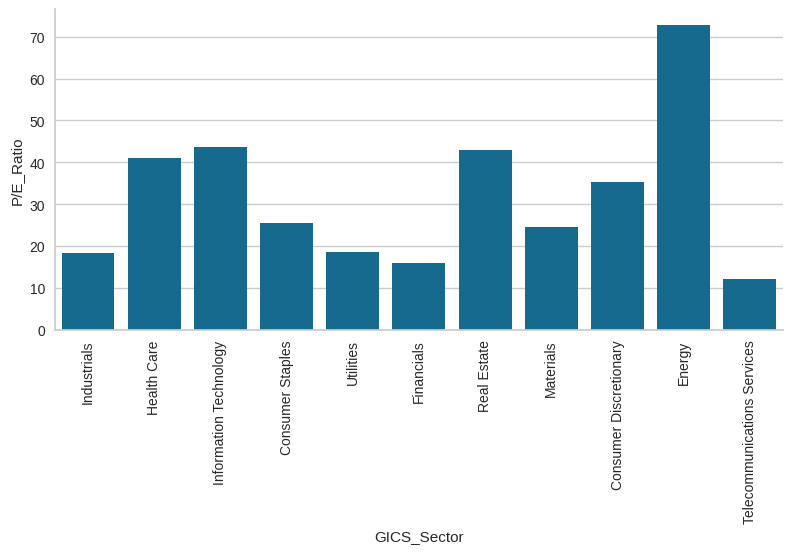

In [ ]:
sns.catplot(data=df, x='GICS_Sector', y='P/E_Ratio', kind='bar', height=4, aspect=2, ci=None)
plt.xticks(rotation=90);

Observations:
* Energy sector has the highest P/E Ratio.
* Telecommunications Services and Industrials have the lowest P/E Ratio.

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

### Outlier check

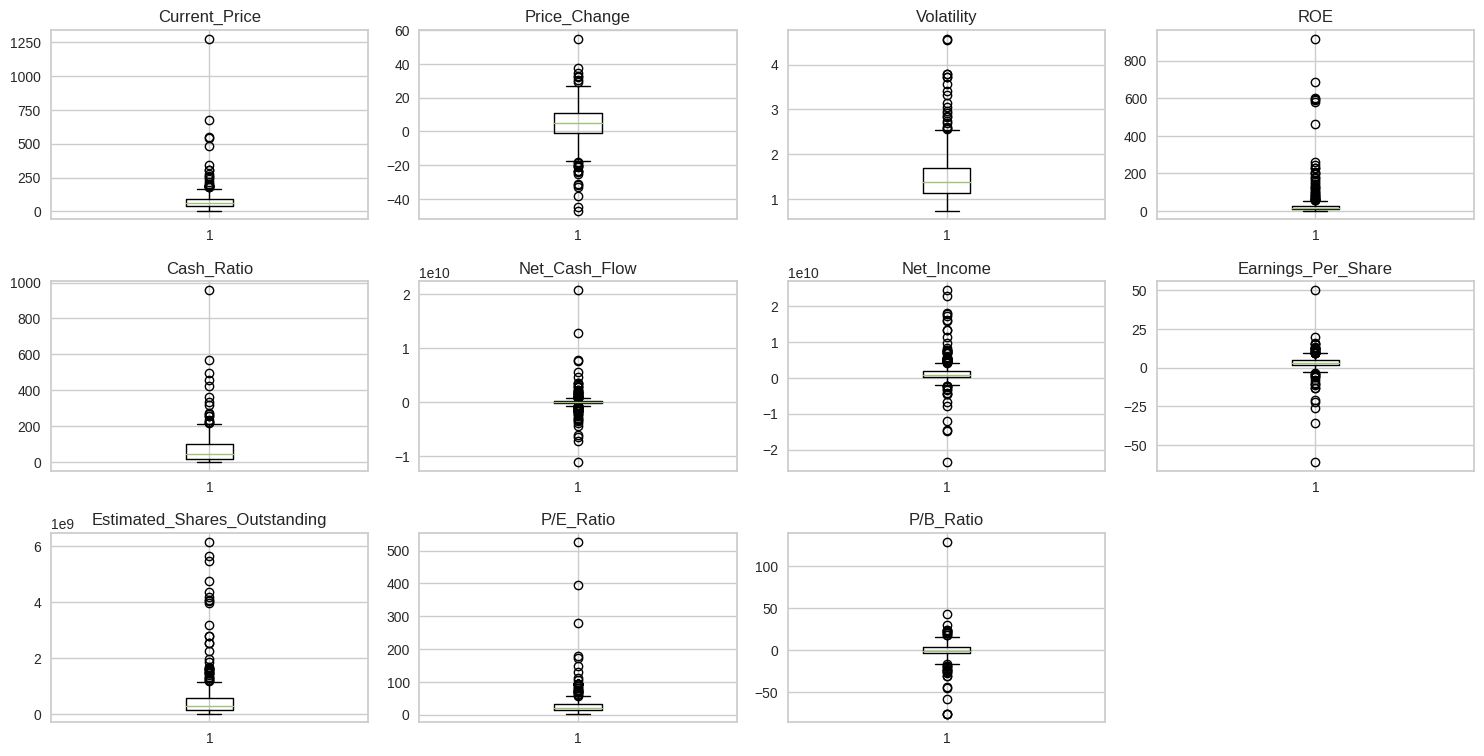

In [ ]:
# plot boxplots of all numberica columns
plt.figure(figsize=(15, 10))

for i , variable in enumerate(num_cols):
    plt.subplot(4, 4, i+1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Observations:
* There are many outliers in the data.
* However, we will not treat them as they appear to be proper values.

### Missing value check

In [ ]:
# check for missing values
df.isnull().sum()

Ticker_Symbol                   0
Security                        0
GICS_Sector                     0
GICS_Sub_Industry               0
Current_Price                   0
Price_Change                    0
Volatility                      0
ROE                             0
Cash_Ratio                      0
Net_Cash_Flow                   0
Net_Income                      0
Earnings_Per_Share              0
Estimated_Shares_Outstanding    0
P/E_Ratio                       0
P/B_Ratio                       0
dtype: int64

* There are no missing values (NaN) in the dataset.

### Duplicate rows

In [ ]:
# check for duplicate rows
df.duplicated().sum()

0

* There are not duplicate rows.

### Scale data

In [ ]:
# Scale numeric columns so that we can compare columns of different labels. Using z-score.
scaler=StandardScaler()
subset=df[num_cols].copy()
subset_scaled=scaler.fit_transform(subset)

In [ ]:
# creating a dataframe of the new scaled numeric columns
subset_scaled_df=pd.DataFrame(subset_scaled, columns=subset.columns)

# look at first 5 rows on new scaled dataframe
subset_scaled_df.head()

Current_Price  Price_Change  Volatility       ROE  Cash_Ratio  \
0      -0.393341      0.493950    0.272749  0.989601   -0.210698   
1      -0.220837      0.355439    1.137045  0.937737    0.077269   
2      -0.367195      0.602479   -0.427007 -0.192905   -0.033488   
3       0.133567      0.825696   -0.284802 -0.317379    1.218059   
4      -0.260874     -0.492636    0.296470 -0.265515    2.237018   

   Net_Cash_Flow  Net_Income  Earnings_Per_Share  \
0      -0.339355    1.554415            1.309399   
1      -0.002335    0.927628            0.056755   
2       0.454058    0.744371            0.024831   
3      -0.152497   -0.219816           -0.230563   
4       0.133564   -0.202703           -0.374982   

   Estimated_Shares_Outstanding  P/E_Ratio  P/B_Ratio  
0                      0.107863  -0.652487  -0.506653  
1                      1.250274  -0.311769  -0.504205  
2                      1.098021  -0.391502   0.094941  
3                     -0.091622   0.947148   0.424333  
4                      1.978399   3.293307   0.199196

## EDA

- It is a good idea to explore the data once again after manipulating it.

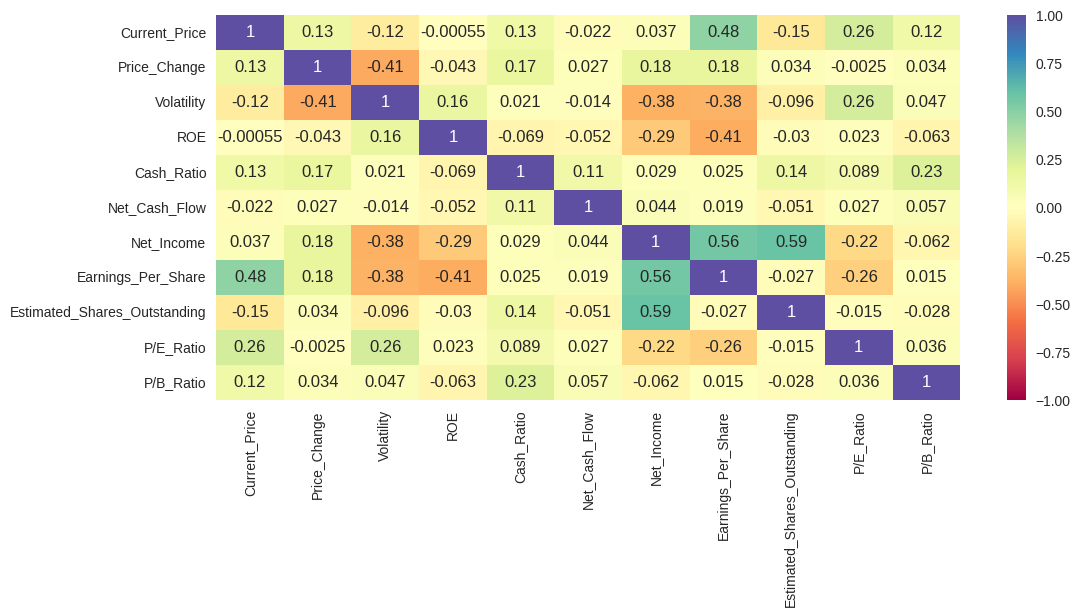

In [ ]:
# explore data after manipulation
plt.figure(figsize=(12, 5))
sns.heatmap(subset_scaled_df.corr(), vmin=-1, vmax=1, annot=True,cmap='Spectral', cbar=True);

* data has not changed, will continue to cluster model building

## K-means Clustering

In [ ]:
# make a copy of the scaled dataset for k-means
kmeans_subset_scaled_df = subset_scaled_df.copy()

### Elbow Method

* Approach #1 to find best k-value

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.269236715539074
Number of Clusters: 4 	Average Distortion: 2.175554082632614
Number of Clusters: 5 	Average Distortion: 2.136852169310594
Number of Clusters: 6 	Average Distortion: 2.0713095032364506
Number of Clusters: 7 	Average Distortion: 1.9775989987671811
Number of Clusters: 8 	Average Distortion: 1.9652603012304684
Number of Clusters: 9 	Average Distortion: 1.9311613101229936
Number of Clusters: 10 	Average Distortion: 1.8502089919483544
Number of Clusters: 11 	Average Distortion: 1.8248014803579016
Number of Clusters: 12 	Average Distortion: 1.7525839358924045
Number of Clusters: 13 	Average Distortion: 1.722563828836958
Number of Clusters: 14 	Average Distortion: 1.6925733787700508


Text(0.5, 1.0, 'Selecting k-value via the Elbow Method (Euclidean distance)')

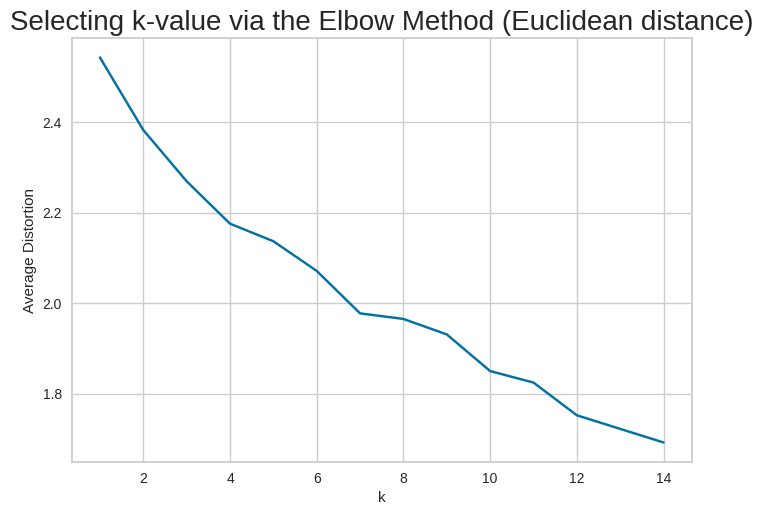

In [ ]:
# Elbow method to find best k-value using Euclidean distance

# run for models of 1 cluster to 10 clusters
clusters = range(1, 15)
meanDistortions = []

# Using euclidean distance, find average distortion
for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(kmeans_subset_scaled_df)
    prediction = model.predict(kmeans_subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(kmeans_subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

# graph average distortions for the cluster options
plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k-value via the Elbow Method (Euclidean distance)", fontsize=20)

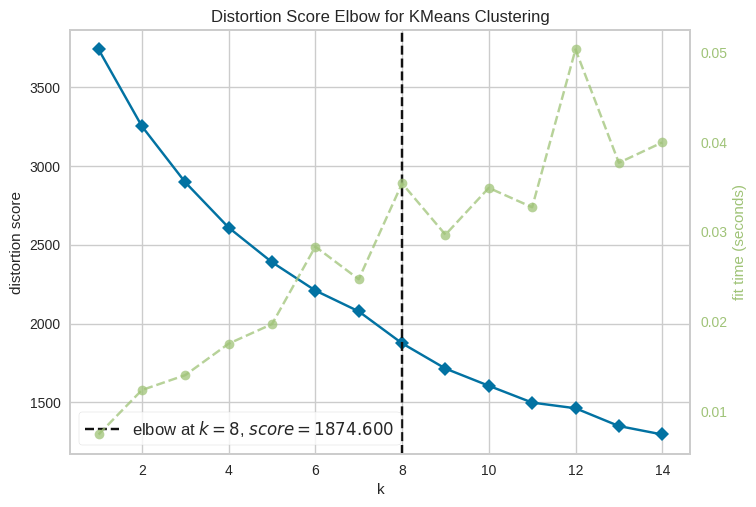

In [ ]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
visualizer.fit(kmeans_subset_scaled_df)  # fit the data to the visualizer
visualizer.show();  # finalize and render figure

**The appropriate value of k from the Euclidean elbow curve appears to be 4 or 7. As usual, we will not ulitze the suggest elbow of k=6.**


### Now Check Silhouette Scores

* Approach #2 to find best k-value

For n_clusters = 2, silhouette score is 0.43969639509980457
For n_clusters = 3, silhouette score is 0.4644405674779404
For n_clusters = 4, silhouette score is 0.45434371948348606
For n_clusters = 5, silhouette score is 0.43169988466492354
For n_clusters = 6, silhouette score is 0.36698524210914063
For n_clusters = 7, silhouette score is 0.10587349598463779
For n_clusters = 8, silhouette score is 0.40021596082234684
For n_clusters = 9, silhouette score is 0.4051539505522535
For n_clusters = 10, silhouette score is 0.1147132918355368
For n_clusters = 11, silhouette score is 0.16268826704862685
For n_clusters = 12, silhouette score is 0.12883008320005324
For n_clusters = 13, silhouette score is 0.1744804713048242
For n_clusters = 14, silhouette score is 0.17457839075773943


Text(0.5, 1.0, 'Selecting k-value via Silhouette Method')

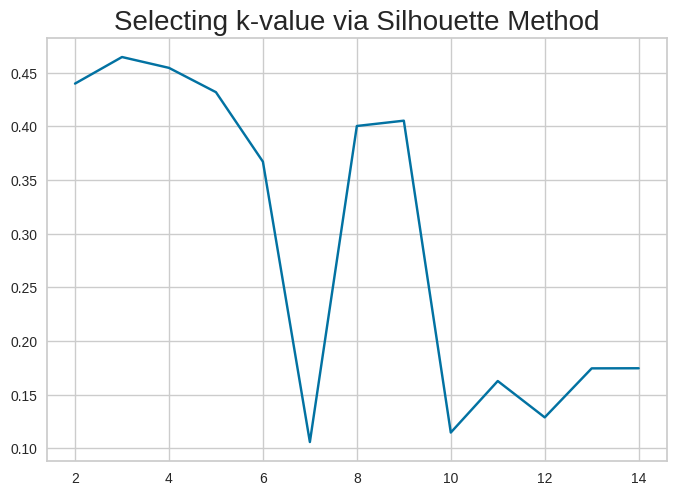

In [ ]:
# finding k-value, optimal no. of clusters, with silhouette coefficients
sil_score = []
cluster_list = list(range(2, 15))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((kmeans_subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(kmeans_subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

plt.title("Selecting k-value via Silhouette Method", fontsize=20)

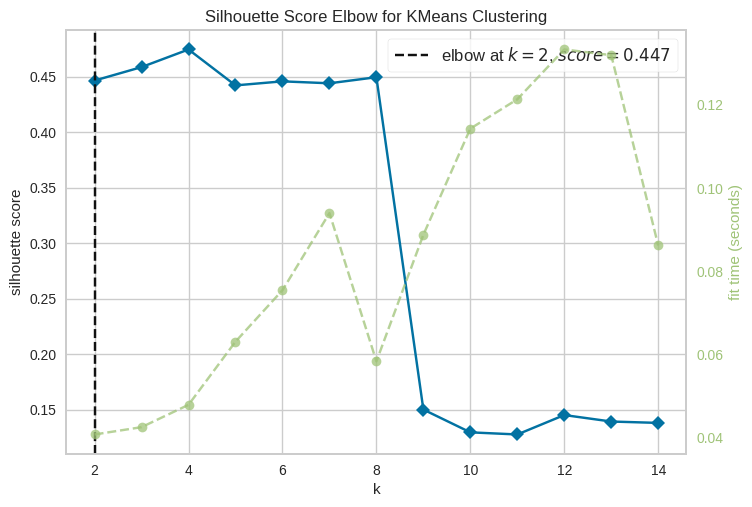

In [ ]:
model=KMeans(random_state=1)
visualizer=KElbowVisualizer(model, k=(2,15), metric='silhouette', timings=True)
visualizer.fit(kmeans_subset_scaled_df)
visualizer.show();

**We want the silhouette score closest to 1, while not having an excess number of clusters. Thus, we will procede with k=3 or 4**

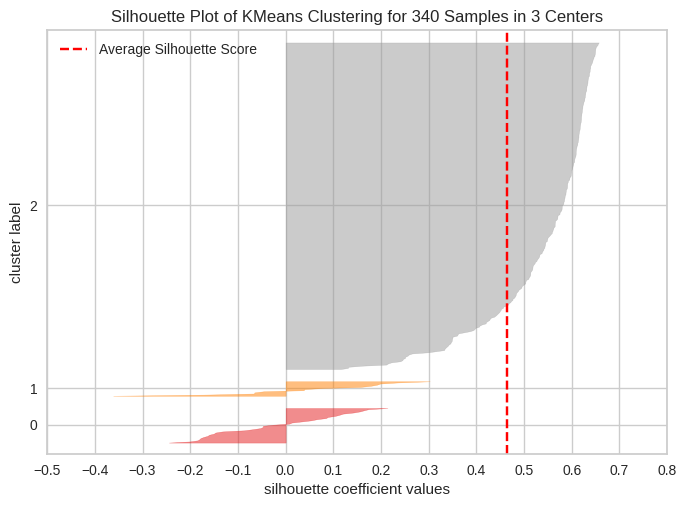

In [ ]:
# visualize the optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(kmeans_subset_scaled_df)
visualizer.show();

* We see 2 clusters with negative scores. Not all clusters reach the average silhouette score

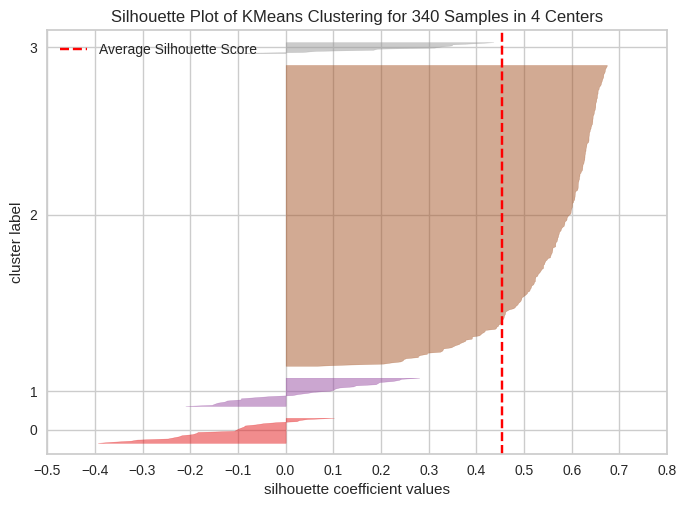

In [ ]:
# visualize the optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(kmeans_subset_scaled_df)
visualizer.show();

* We see 2 clusters with negative scores. Now 1 cluster reaches the average silhouette score. 1 is very close.

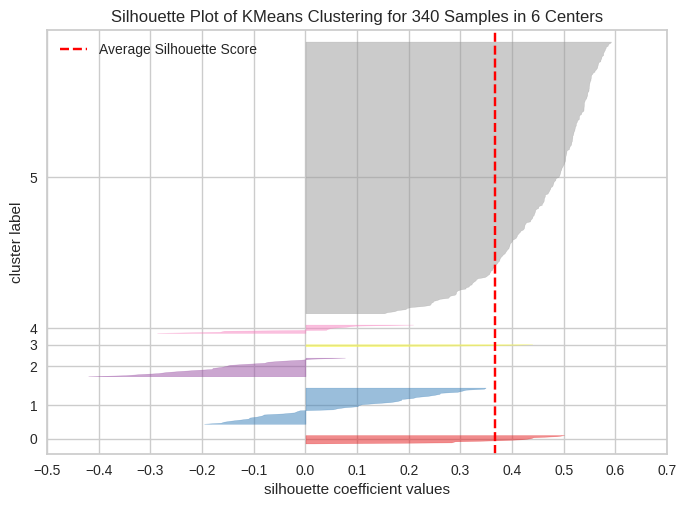

In [ ]:
# visualize the optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(kmeans_subset_scaled_df)
visualizer.show();

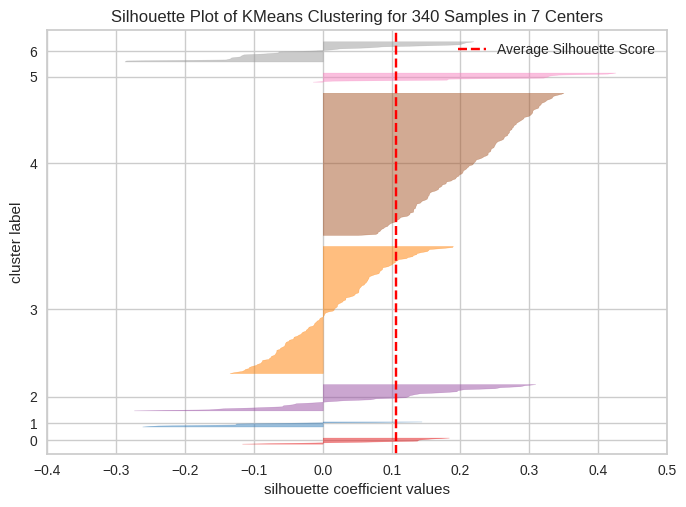

In [ ]:
# visualize the optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(7, random_state=1))
visualizer.fit(kmeans_subset_scaled_df)
visualizer.show();

### Create Final Model

Elbow method: determined k=4 or 7 is best

Silhouette method: determine k=3 or 4 is best

Based on clients needs and context, we will procede with k=4 as the appropriate number of clusters because:
  * there is a knick in the elbot curve
  * the silhouette score is high at 0.45

In [ ]:
# fit model to scaled numeric dataset
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(kmeans_subset_scaled_df)

KMeans(n_clusters=4, random_state=0)

In [ ]:
# adding kmeans cluster labels to the original dataframe & kmeans scaled df
kmeans_subset_scaled_df["K_means_cluster"] = kmeans.labels_
df["K_means_cluster"] = kmeans.labels_

# check for new column in dataset
df.head(2)

Ticker_Symbol                 Security  GICS_Sector GICS_Sub_Industry  \
0           AAL  American Airlines Group  Industrials          Airlines   
1          ABBV                   AbbVie  Health Care   Pharmaceuticals   

   Current_Price  Price_Change  Volatility  ROE  Cash_Ratio  Net_Cash_Flow  \
0      42.349998      9.999995    1.687151  135          51     -604000000   
1      59.240002      8.339433    2.197887  130          77       51000000   

   Net_Income  Earnings_Per_Share  Estimated_Shares_Outstanding  P/E_Ratio  \
0  7610000000               11.39                  6.681299e+08   3.718174   
1  5144000000                3.15                  1.633016e+09  18.806350   

   P/B_Ratio  K_means_cluster  
0  -8.784219                0  
1  -8.750068                0

### Cluster Profiling

In [ ]:
# get the numeric columns of the new dataframe
kmeans_num_cols=num_cols+["K_means_cluster"]

In [ ]:
# group by k-value, then find the averages for each column
kmeans_cluster_profile = df[kmeans_num_cols].groupby("K_means_cluster").mean()

In [ ]:
# add new column that tells how many items belong to each group/centroid
kmeans_cluster_profile["count_in_each_cluster"] = (
    df.groupby("K_means_cluster")["GICS_Sector"].count().values
)

In [ ]:
# let's display cluster profiles
kmeans_cluster_profile.style.highlight_max(color="mediumaquamarine", axis=0)

In [ ]:
# check that 'K_means_cluster' column has been added
df.head(2)

Ticker_Symbol                 Security  GICS_Sector GICS_Sub_Industry  \
0           AAL  American Airlines Group  Industrials          Airlines   
1          ABBV                   AbbVie  Health Care   Pharmaceuticals   

   Current_Price  Price_Change  Volatility  ROE  Cash_Ratio  Net_Cash_Flow  \
0      42.349998      9.999995    1.687151  135          51     -604000000   
1      59.240002      8.339433    2.197887  130          77       51000000   

   Net_Income  Earnings_Per_Share  Estimated_Shares_Outstanding  P/E_Ratio  \
0  7610000000               11.39                  6.681299e+08   3.718174   
1  5144000000                3.15                  1.633016e+09  18.806350   

   P/B_Ratio  K_means_cluster  
0  -8.784219                0  
1  -8.750068                0

In [ ]:
# list companies in each hierarchical cluster
for cluster in df['K_means_cluster'].unique():
    print(f"In Cluster {cluster}, the companies are:")
    print(df[df['K_means_cluster'] == cluster]['Security'].unique())
    print('-----')

In Cluster 0, the companies are:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castle International Co

In [ ]:
# Listing the sectors in keach cluster
df.groupby(['K_means_cluster', 'GICS_Sector'])['Security'].count()

K_means_cluster  GICS_Sector                
0                Consumer Discretionary         33
                 Consumer Staples               17
                 Energy                          6
                 Financials                     45
                 Health Care                    28
                 Industrials                    52
                 Information Technology         24
                 Materials                      19
                 Real Estate                    26
                 Telecommunications Services     2
                 Utilities                      24
1                Energy                         22
                 Industrials                     1
                 Information Technology          2
                 Materials                       1
2                Consumer Discretionary          6
                 Consumer Staples                1
                 Energy                          1
                 Health Care         

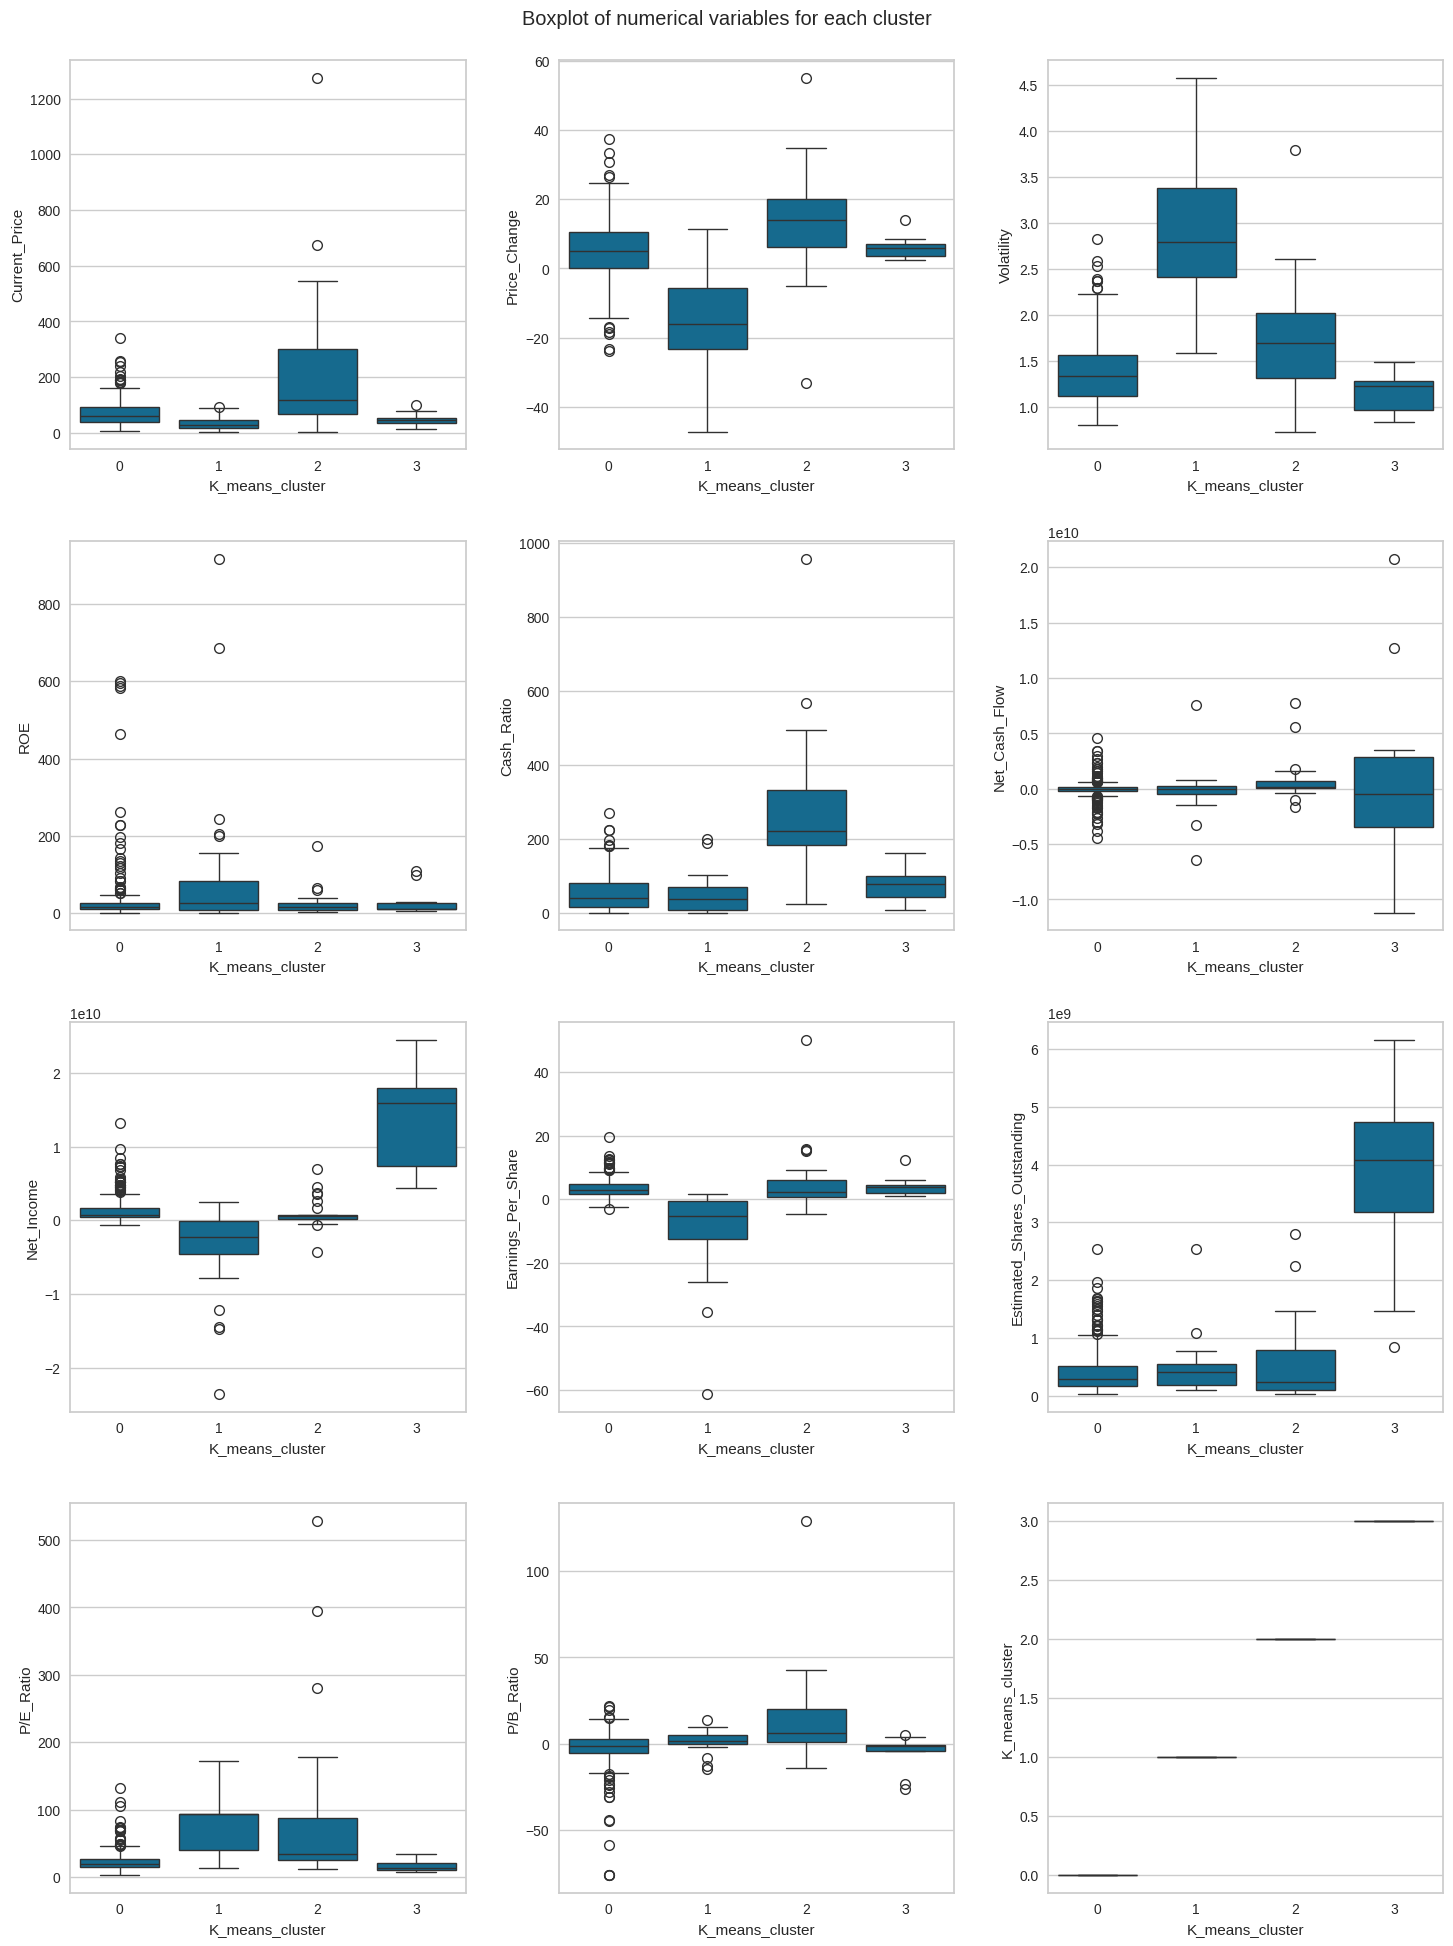

In [ ]:
plt.figure(figsize=(15, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(kmeans_num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df, x="K_means_cluster", y=variable)

plt.tight_layout(pad=2.0)

In [ ]:
#compare cluster vs categorical column(`GICS_Sector`)
pd.crosstab(df.K_means_cluster, df.GICS_Sector).style.highlight_max(
    color="mediumaquamarine", axis=0
)

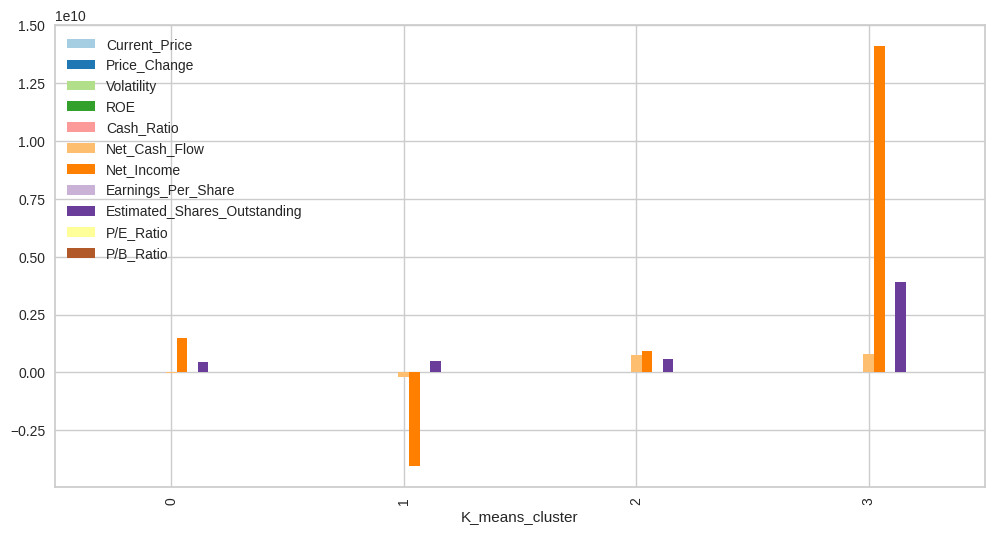

In [ ]:
# Graph mean values for each k-means cluster
df[kmeans_num_cols].groupby('K_means_cluster').mean().plot.bar(figsize=(12, 6), colormap='Paired');

### Insights

- **Cluster 0**:
 * There are 277 stocks in this cluster.
    * A diversification of all sectors, where energy sector comprises the least amount.
 * Stocks with:
    * Low current price
    * Lowest cash ratio
    * Lowest net cash flow
    * Lowest outstanding estimated shares
    * Low P/E ratio


- **Cluster 1**:
 * There are 13 stocks in this cluster.
    * Financials and healthcare are the predominate sectors in this cluster
 * Stocks with:
    * Low current price
    * Lowest volatility
    * Highest net cash flow
    * Highest net income
    * Highest outstanding estimated shares
    * Lowest P/E ratio


- **Cluster 2**:
 * There are 35 stocks in this cluster.
    * Energy is the predominate sector in this cluster
 * Stocks with:
    * Lowest price change
    * Highest volatility
    * Lowest net income
    * Lowest earning per share
    * Low outstanding estimated shares
    * Highest P/E ratio
    * Lowest P/B ratio

- **Cluster 3**:
 * There are 15 stocks in this cluster.
    * Consumer discretionary and Healthcare are the predominate sectors in this cluster
 * Stocks with:
    * Highest current price
    * Highest price change
    * Highest cash ratio
    * Highest earnings per share
    * Highest P/B ratio


## Hierarchical Clustering

In [ ]:
# make a copy of the scaled dataset for k-means
hier_subset_scaled_df = subset_scaled_df.copy()

### Computing Cophenetic Correlation

In [ ]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hier_subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hier_subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.925919553052459.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correla

In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with Euclidean distance and average linkage.


**Note**: The best distance metric is Euclidean.Thus we will explore 2 other linkage methods that only work with Euclidean: ward and centroid linkage

**Let's explore different linkage methods with Euclidean distance only.**

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hier_subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hier_subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.


In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


Observations:
* We see that the cophenetic correlation is maximum with Euclidean distance and average linkage.

### Checking Dendrograms

**Let's see the dendrograms for Euclidean distance with the different linkage methods.**


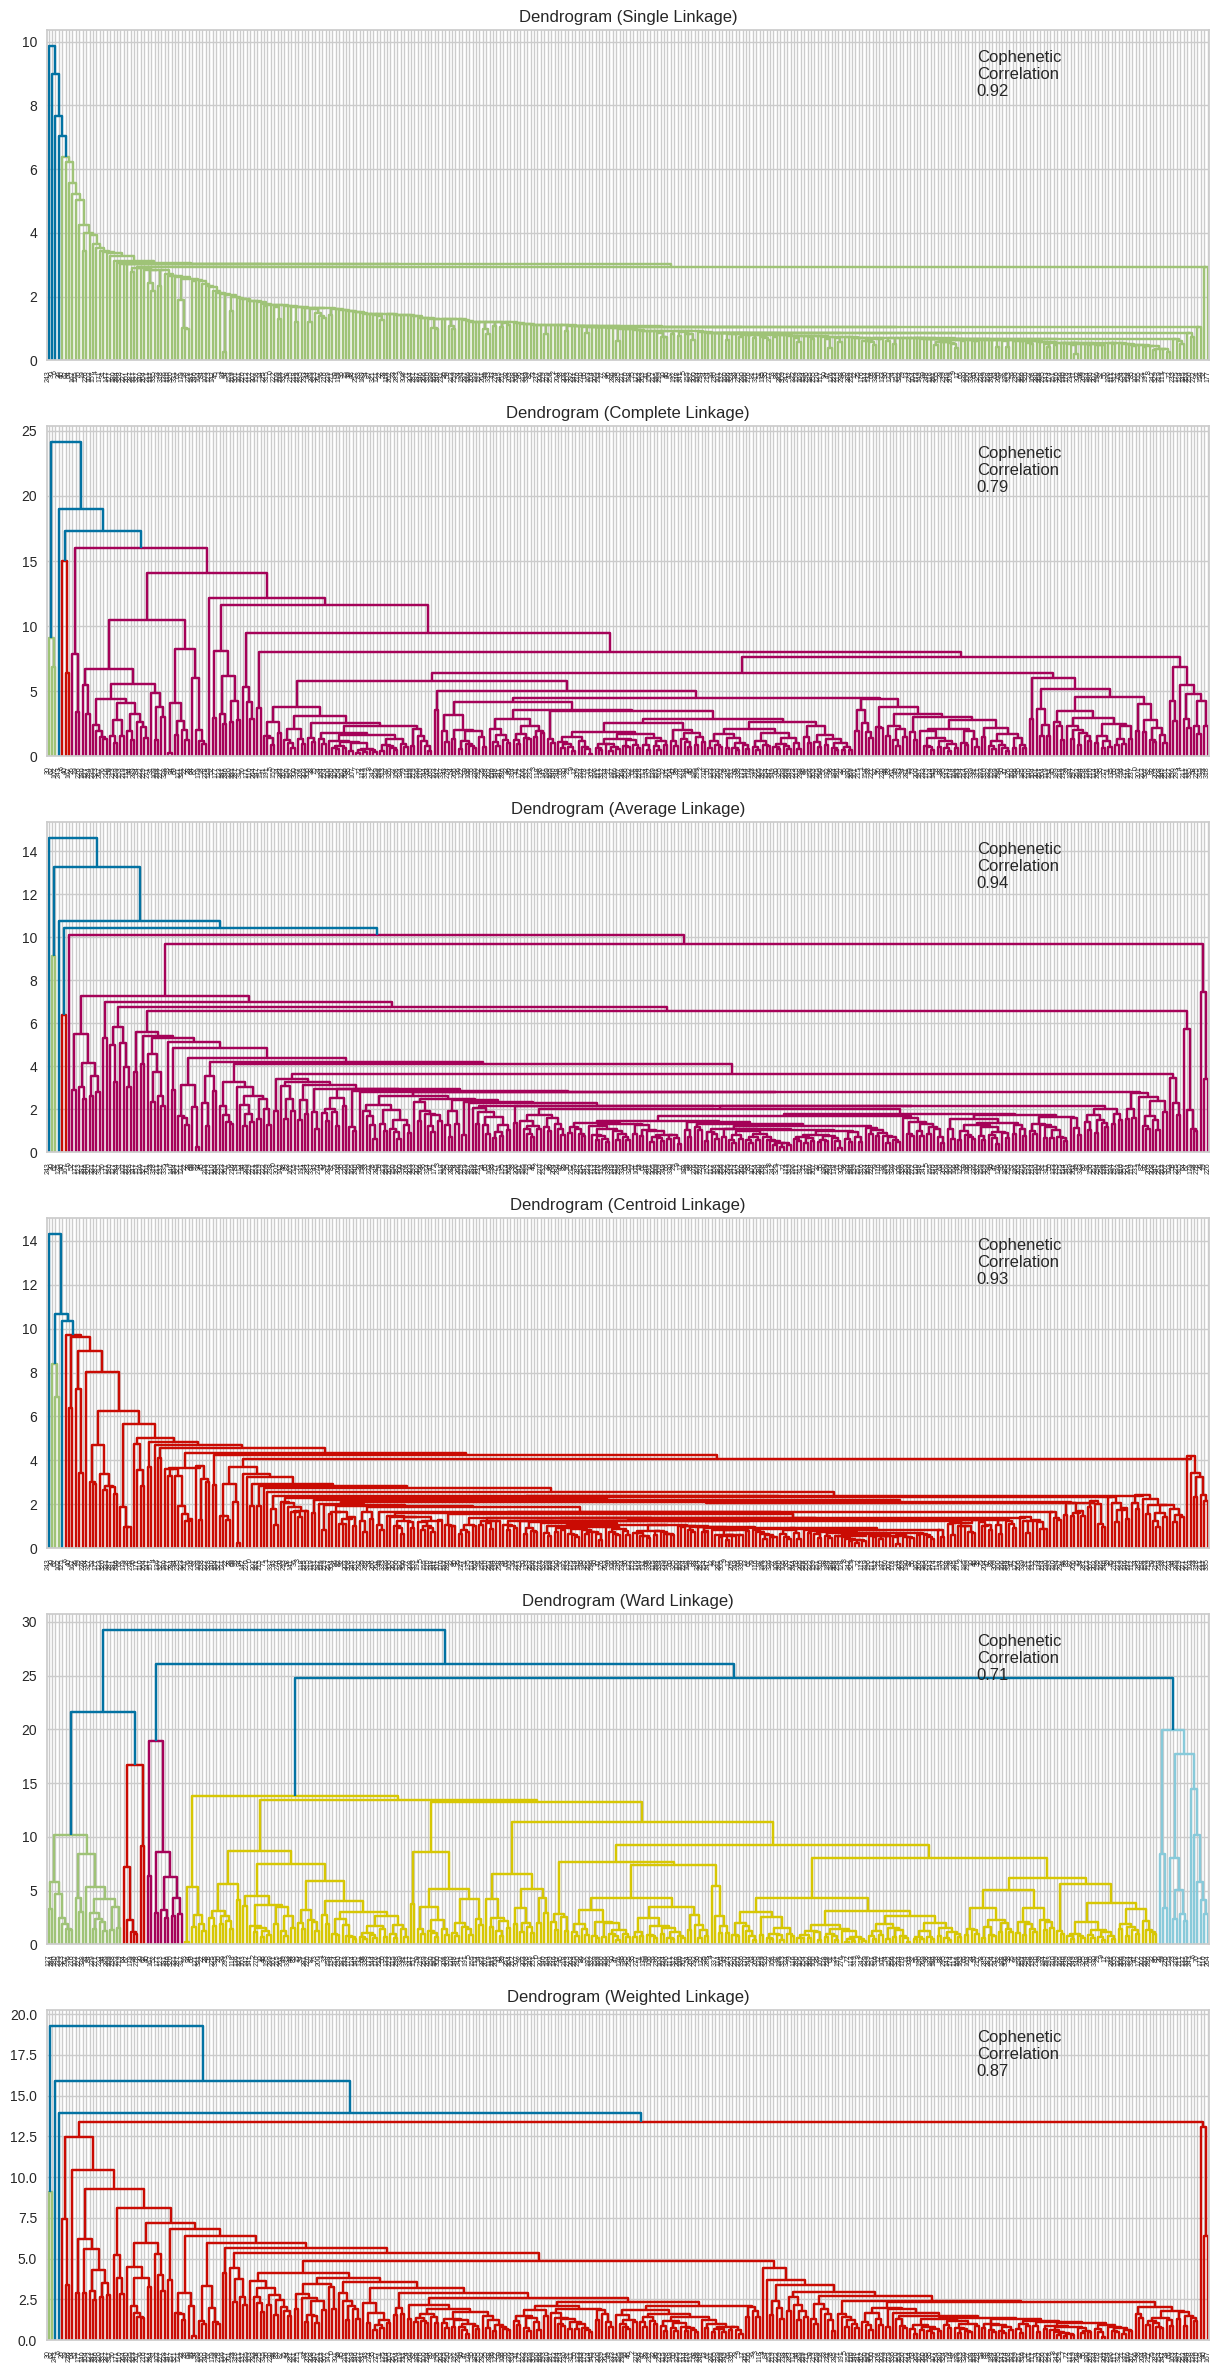

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hier_subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hier_subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

**Observations**
* The cophenetic correlation is the highest for average and centroid linkage.
* But out of all the dendrograms we see it is clear that the dendrogram with Ward linkage gives us the most distinctive separated clusters!
* 4 will be the appropriate number of clusters that we will move forward with.

### Creating Final Model Using sklearn


In [ ]:
# create model with cluster, distance, and linkage from above
HCmodel = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
HCmodel.fit(hier_subset_scaled_df)

AgglomerativeClustering(affinity='euclidean', n_clusters=4)

In [ ]:
# add cluster number column to original and hierarchical scaled df
hier_subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_

In [ ]:
# look at new columns in the df
df.head(2)

Ticker_Symbol                 Security  GICS_Sector GICS_Sub_Industry  \
0           AAL  American Airlines Group  Industrials          Airlines   
1          ABBV                   AbbVie  Health Care   Pharmaceuticals   

   Current_Price  Price_Change  Volatility  ROE  Cash_Ratio  Net_Cash_Flow  \
0      42.349998      9.999995    1.687151  135          51     -604000000   
1      59.240002      8.339433    2.197887  130          77       51000000   

   Net_Income  Earnings_Per_Share  Estimated_Shares_Outstanding  P/E_Ratio  \
0  7610000000               11.39                  6.681299e+08   3.718174   
1  5144000000                3.15                  1.633016e+09  18.806350   

   P/B_Ratio  K_means_cluster  HC_Clusters  
0  -8.784219                0            3  
1  -8.750068                0            3

### Cluster Profiling

In [ ]:
# get numeric columns of dataset after adding cluster column
hc_num_col = df.select_dtypes(include=np.number).columns.tolist()

In [ ]:
# averages for each cluster by column
hc_cluster_profile = df[hc_num_col].groupby("HC_Clusters").mean()

In [ ]:
# count how many values exist in each cluster
hc_cluster_profile["count_in_each_segments"] = (
    df.groupby("HC_Clusters")["GICS_Sector"].count().values
)

In [ ]:
# let's display cluster profiles
hc_cluster_profile.style.highlight_max(color="mediumaquamarine", axis=0)

In [ ]:
df.head(2)


Ticker_Symbol                 Security  GICS_Sector GICS_Sub_Industry  \
0           AAL  American Airlines Group  Industrials          Airlines   
1          ABBV                   AbbVie  Health Care   Pharmaceuticals   

   Current_Price  Price_Change  Volatility  ROE  Cash_Ratio  Net_Cash_Flow  \
0      42.349998      9.999995    1.687151  135          51     -604000000   
1      59.240002      8.339433    2.197887  130          77       51000000   

   Net_Income  Earnings_Per_Share  Estimated_Shares_Outstanding  P/E_Ratio  \
0  7610000000               11.39                  6.681299e+08   3.718174   
1  5144000000                3.15                  1.633016e+09  18.806350   

   P/B_Ratio  K_means_cluster  HC_Clusters  
0  -8.784219                0            3  
1  -8.750068                0            3

In [ ]:
# list companies in each hierarchical cluster
for cluster in df['HC_Clusters'].unique():
    print(f"In Cluster {cluster}, the companies are:")
    print(df[df['HC_Clusters'] == cluster]['Security'].unique())
    print('-----')

In Cluster 3, the companies are:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Caterpillar Inc.' 'Chubb Limited' 'CBRE Group'

In [ ]:
# Listing the sectors in each cluster
df.groupby(['HC_Clusters', 'GICS_Sector'])['Security'].count()

HC_Clusters  GICS_Sector                
0            Consumer Discretionary          1
             Consumer Staples                2
             Energy                         22
             Financials                      1
             Industrials                     1
             Information Technology          1
             Materials                       1
1            Consumer Discretionary          3
             Consumer Staples                1
             Health Care                     5
             Information Technology          4
             Real Estate                     1
             Telecommunications Services     1
2            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      4
             Health Care                     1
             Information Technology          1
             Telecommunications Services     2
3            Consum

In [ ]:
# look at sectors in each hierarchical cluster
df.groupby(['HC_Clusters', 'GICS_Sector'])['Security'].apply(list)

HC_Clusters  GICS_Sector                
0            Consumer Discretionary                                  [Charter Communications]
             Consumer Staples                             [Colgate-Palmolive, Kimberly-Clark]
             Energy                         [Apache Corporation, Anadarko Petroleum Corp, ...
             Financials                                                    [S&P Global, Inc.]
             Industrials                                                           [Allegion]
             Information Technology                                          [Teradata Corp.]
             Materials                                            [Freeport-McMoran Cp & Gld]
1            Consumer Discretionary         [Amazon.com Inc, Chipotle Mexican Grill, Price...
             Consumer Staples                                              [Monster Beverage]
             Health Care                    [Alexion Pharmaceuticals, Amgen Inc, Intuitive...
             Inform

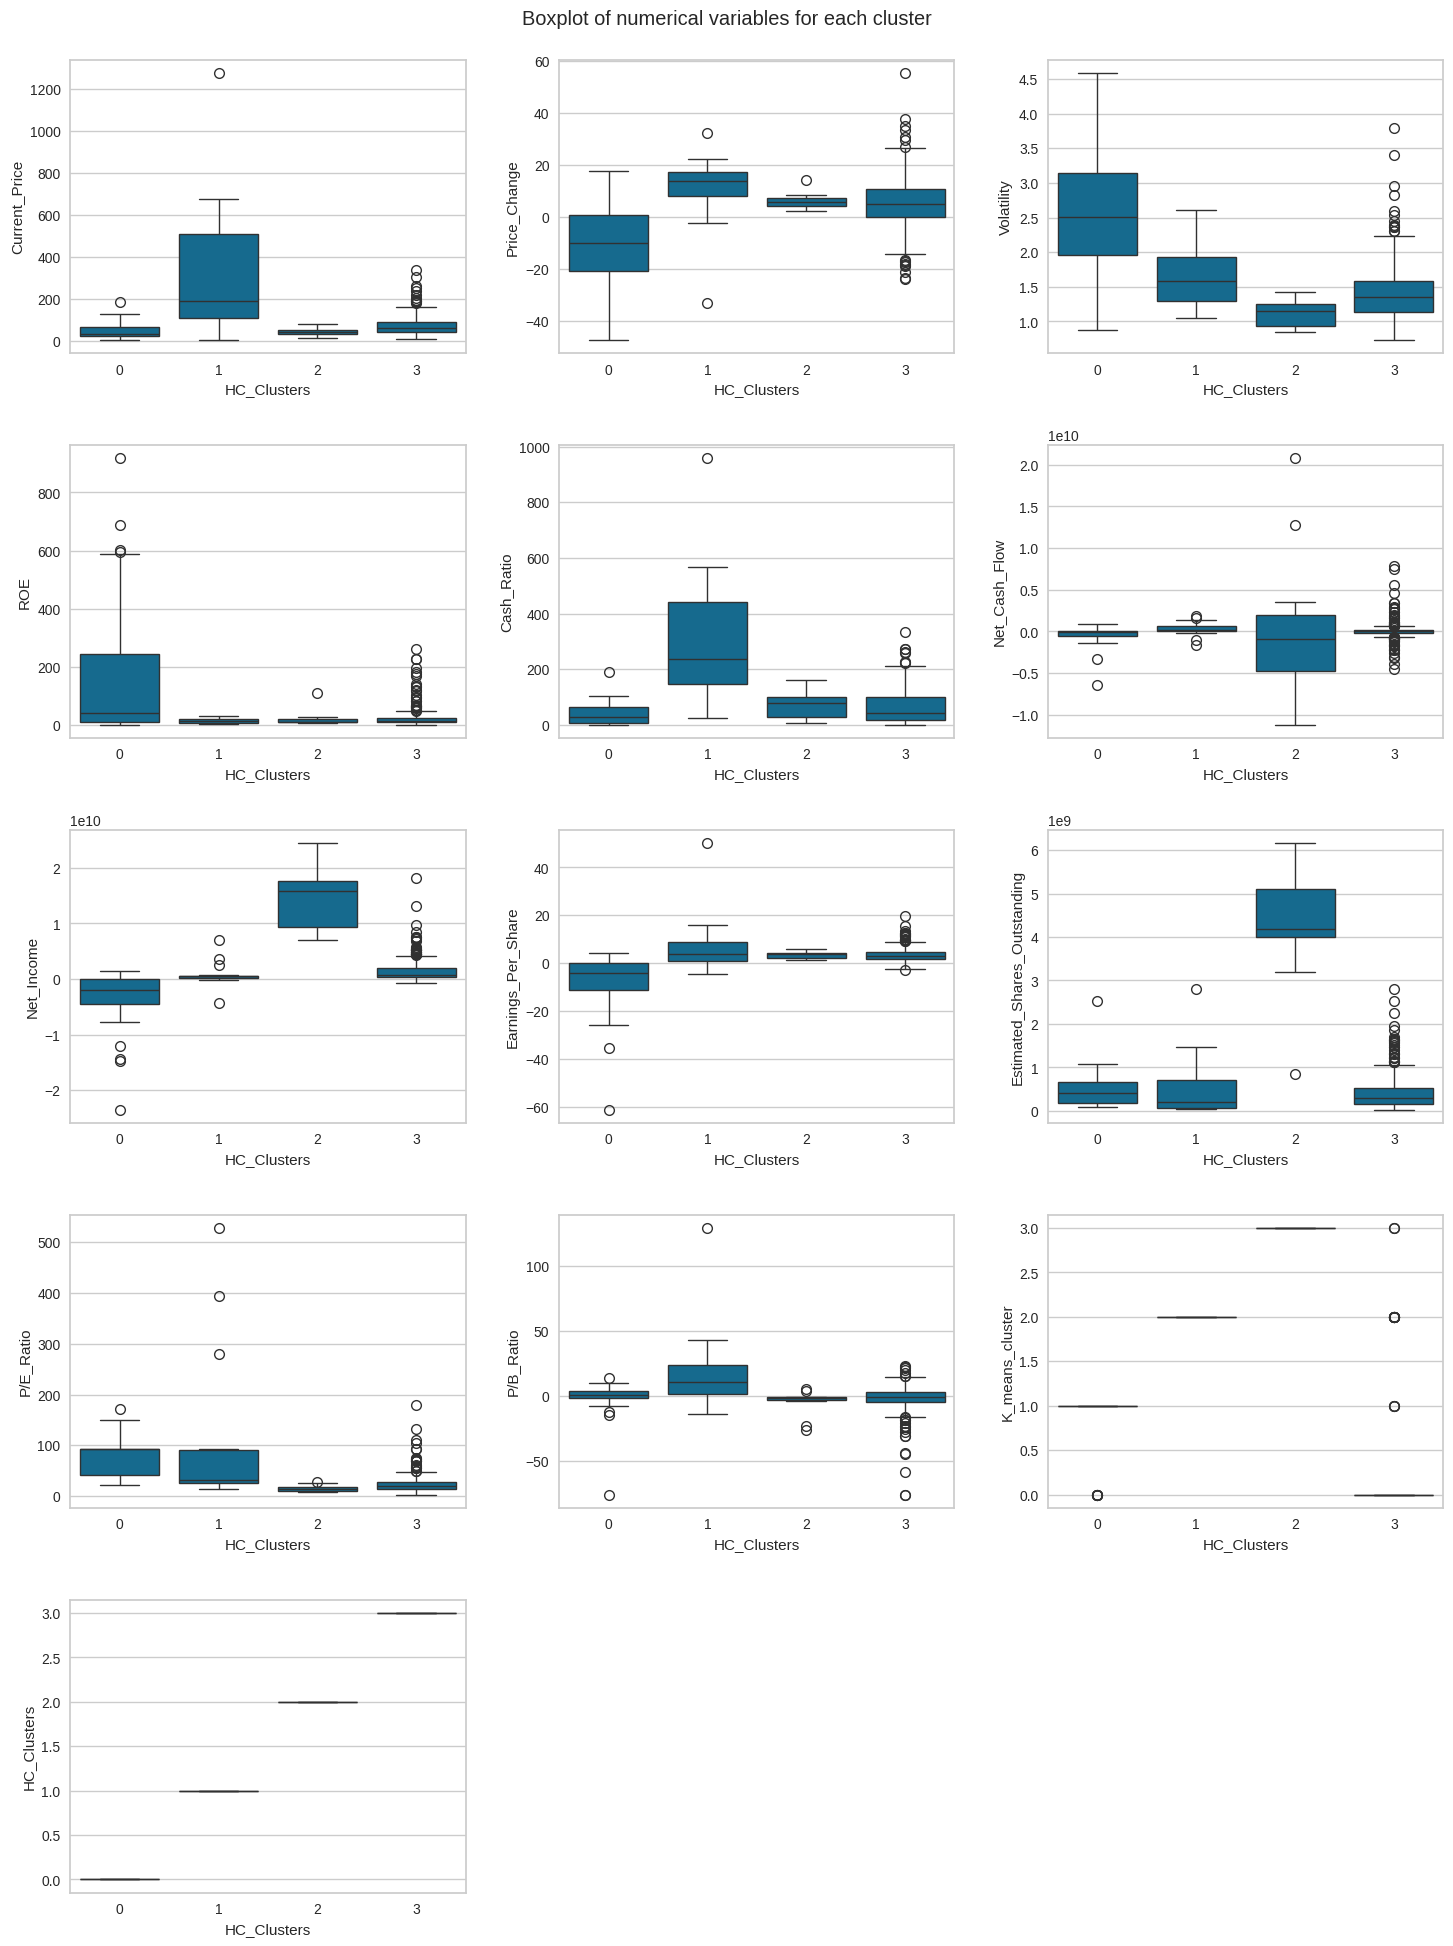

In [ ]:
plt.figure(figsize=(15, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(hc_num_col):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(data=df, x="HC_Clusters", y=variable)

plt.tight_layout(pad=2.0)

**Let's compare Cluster to GICS Sector**






In [ ]:
#compare cluster vs categorical column(`GICS_Sector`)
pd.crosstab(df.HC_Clusters, df.GICS_Sector).style.highlight_max(color="mediumaquamarine", axis=0)

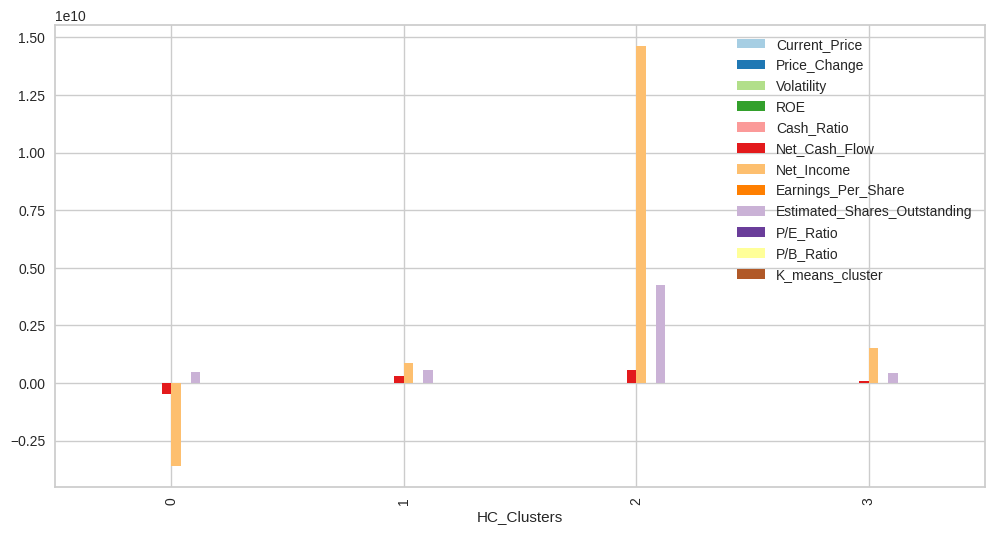

In [ ]:
# Graph mean values for each hierarchical cluster
df[hc_num_col].groupby('HC_Clusters').mean().plot.bar(figsize=(12, 6), colormap='Paired');

### Insights

- **Cluster 0**:
 * There are 29 stocks in this cluster.
    * 22 of these stocks are in the energy sector, the majority sector
 * Stocks with:
    * Low current price
    * Lowest price change amount
    * Highest ROE
    * Least net cash flow
    * Least net income
    * Least earnings per share
    * High P/E ratio

- **Cluster 1**:
 * There are 15 stocks in this cluster.
    * Financial and telecommunications services are the predominate sectors in this cluster
 * Stocks with:
    * Highest current price
    * Highest price change amount
    * Lowest ROE
    * Highest earnings per share
    * High P/E ratio
    * Highest P/B ratio

- **Cluster 2**:
 * There are 11 stocks in this cluster.
    * Healthcare and information technology are the predominate sectors in this cluster
  * Stocks with:
    * Lowest current price
    * Moderate price change amount
    * Highest net cash flow
    * Highest net income
    * Highest estimated shares outstanding
    * Least P/E ratio
    * Least P/B ratio

- **Cluster 3**:
 * There are 285 stocks in this cluster. The largest cluster.
    * A diversification of all sectors, where energy sector comprises the least amount.
  * Stocks with:
    * Midlevel current price
    * Moderate price change amount
    * Least estimated shares outstanding

**Observations**
*

**Observations**
* Cluster 0 is dominated by energy stocks
* Cluser

## K-means vs Hierarchical Clustering

In [ ]:
# Total rows in each k-means cluster
kmeans_cluster_profile["count_in_each_cluster"]

K_means_cluster
0    276
1     26
2     25
3     13
Name: count_in_each_cluster, dtype: int64

In [ ]:
# Total rows in each hierarchical cluster
hc_cluster_profile["count_in_each_segments"]

HC_Clusters
0     29
1     15
2     11
3    285
Name: count_in_each_segments, dtype: int64

In [ ]:
# How many rows belong to a cluster in K-means and hierarchical
count = ((df['K_means_cluster'] == 0) & (df['HC_Clusters'] == 3)).sum()
print('Number of rows are shared between K-Means cluster 0 and Hierarchical cluster 3:', count)

count = ((df['K_means_cluster'] == 1) & (df['HC_Clusters'] == 1)).sum()
print('Number of rows are shared between K-Means cluster 1 and Hierarchical cluster 1:', count)

count = ((df['K_means_cluster'] == 2) & (df['HC_Clusters'] == 0)).sum()
print('Number of rows are shared between K-Means cluster 2 and Hierarchical cluster 0:', count)

count = ((df['K_means_cluster'] == 3) & (df['HC_Clusters'] == 2)).sum()
print('Number of rows are shared between K-Means cluster 3 and Hierarchical cluster 2:', count)

Number of rows are shared between K-Means cluster 0 and Hierarchical cluster 3: 270
Number of rows are shared between K-Means cluster 1 and Hierarchical cluster 1: 0
Number of rows are shared between K-Means cluster 2 and Hierarchical cluster 0: 0
Number of rows are shared between K-Means cluster 3 and Hierarchical cluster 2: 11


**Observation:**
* There is a strong correlation between the results of K-means and Hierarchical cluster, just labeled in different cluster number.
* Ex) K-means cluster 0 is extremely similar to Hierarchical cluster 3
    * 274 out of 277 shared rows with K-means
    * 274 our of 285 shared rows with Hierarchical

**Important notes:**
* The K-means clustering approach is more computationally efficient than hierachical clustering. Thus the simpler model that is cheaper to utilize.

* If simplicity is not required, then Hierarchical clustering is giving a better model.

* Both clustering methods arrived at the same number of clusters, 4.

* Both clustering methods arrived at similar distinct clusters, neither is more compact..

## Actionable Insights and Recommendations

* It would be advised to move forward with the k-means cluster final model as it is cost effective, efficient, and gives similar results to the more complex hierarchical cluster model.

* Push these stocks clusters out to advisors and investors so that they can align their investment goals to the 4 cluster classes revealed by our modeling.

* Do further analysis on each cluster and GICS Sector to get more detailed findings.


Hierarchical clustering takea-aways:
* **Cluster 0**
Most of these companies are the the energy sector.

* **Cluster 1**
Most of these companies are in the finacial and telecommunications sector.

* **Cluster 2**
Most of these companies are in the healthcare and technology sector.

* **Cluster 3**
Most of these companies are very diversified across the sectors, except energy.


## Add on: PCA for visulization

Let's use Principal Component Analysis (PCA) to visualize the clusters. Unfortunately only can visualize 2-D or 3-D clusters (thus reducing only to 2 or 3 columns). Not good for any anaysis.

Unfortunately we will lose some feature information and only arrive at the 2 most principal components.

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# setting the number of compnents to 2 (2-D)
pca=PCA(n_components=2)

In [ ]:
#transform data and storing results in a dataframe
X_reduced_pca=pca.fit_transform(subset_scaled)
reduced_df_pca=pd.DataFrame(X_reduced_pca,columns=['Component 1','Component 2'])

In [ ]:
# checking the amount of variance explained
pca.explained_variance_ratio_.sum()

0.3712899567725855

* These 2 components/dimensions now explains 37% of the variance of the data.

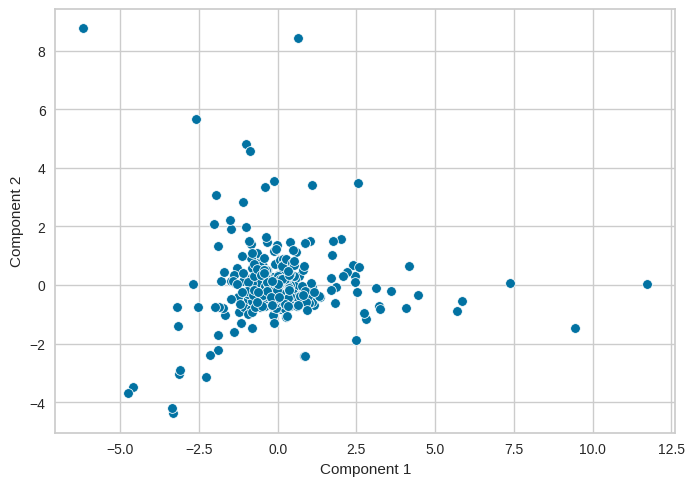

In [ ]:
# visualize principal component scatterplot & target variable
sns.scatterplot(data=reduced_df_pca,x='Component 1',y='Component 2');

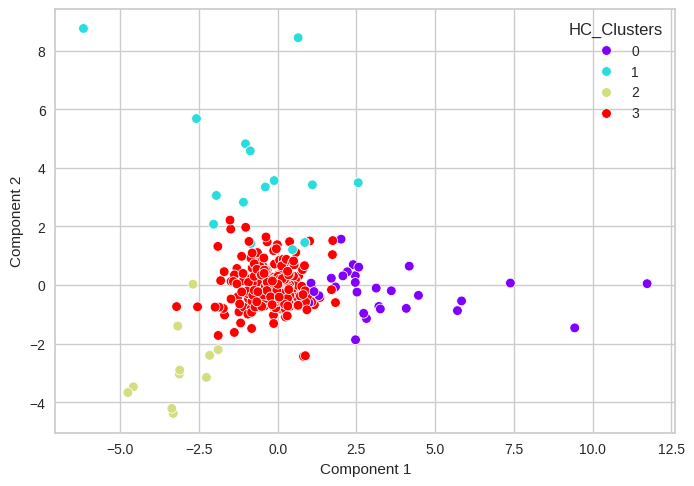

In [ ]:
# visualize principal component scatterplot & target variable, separated by hierarchical clusters
sns.scatterplot(data=reduced_df_pca,x='Component 1',y='Component 2', hue=df['HC_Clusters'], palette='rainbow');

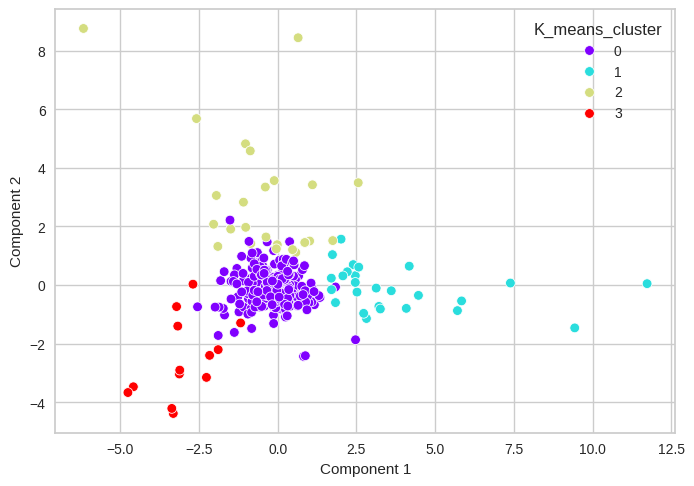

In [ ]:
# visualize principal component scatterplot & target variable, separated by hierarchical clusters
sns.scatterplot(data=reduced_df_pca,x='Component 1',y='Component 2', hue=df['K_means_cluster'], palette='rainbow');

* Unfortunately, the clusters are not distinctively separated. There is overlap.
